# Analysis of Experimental Data

Experimental data will be available for download from our [Gnode repository](https://gin.g-node.org/pspitzner/stimulating_modular_cultures) (after acceptance).
Place the downloaded files in the base directroy of _this_ repo, i.e. `./dat/experiments/`

Most of the analysis is the same for experiments and simulations.
The comparison across conditions is implemented in a stand-alone script `ana/process_conditions.py`, that can be run from a terminal and takes a the following arguments:
* `-i` the base path to the folder where the data is stored.
* `-t` the type of experiment (yields the right subfolders and file names):
    - `exp` for main results, from optogenetic stimulation and different topologies
    - `exp_chemical` for the experiments with KCl
    - `exp_bic` for the experiments with Bicuculline
    - `sim_partial` for simulations where only part of the system was targeted.
* `-o` where to store the output path.

To create the preprocessed data, navigate to the base directory and run:
```bash
python ./ana/process_conditions.py -t exp -i ./dat/experiments/raw/  -o ./dat/experiments/processed/
python ./ana/process_conditions.py -t exp_chemical -i ./dat/experiments/raw/ -o ./dat/experiments/processed/
python ./ana/process_conditions.py -t exp_bic -i ./dat/experiments/raw/ -o ./dat/experiments/processed/
```


This should yield the following files:
```bash
>>> tree -L 2 --dirsfirst ./dat/experiments/processed/
dat/experiments/processed/
├── 1b
│   ├── 210315_A
│   ├── 210315_C
│   ├── 210405_C
│   ├── 210406_B
│   ├── 210406_C
│   ├── 210719_B
│   ├── 210719_C
│   └── 210726_B
├── 3b
│   ├── 210316_A
│   ...
├── Bicuculline_1b
│   ├── 210907_1bB
│   ...
├── KCl_1b
│   ├── 210420_C
│   ...
├── merged
│   ├── 210401_A
│   ...
├── 1b.hdf5
├── 3b.hdf5
├── Bicuculline_1b.hdf5
├── KCl_1b.hdf5
└── merged.hdf5
```

where the `*.hdf5` files contain the preprocessed data and the folders for each experiment have some additional info. See also `save_analysed_h5f` in `ana/process_conditions.py`.

Low-level plotting functions are contained in `ana/plot_helper.py` and
the higher-level wrappers as well as further analysis are in `ana/paper_plots.py`.
In particular, most contend of this notebook can also be found in `paper_plots.py/fig_x()`

Experiments are depicted in Figures 1 and 2, and in the Supplemental Material.
For fine-grained control, we produced every figure panel as a stand-alone and combined them later.

# Plotting

In [2]:
# The autoreload extension allows you to tweak the code in the imported modules (`pp`)
# and rerun cells to reflect the changes.
# 
%load_ext autoreload
%autoreload 2
%load_ext ipy_dict_hierarchy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import sys
sys.path.append("../ana/")
sys.path.append("./../")

from ana import paper_plots as pp
# reduce the printed output, we have lots of details on the INFO level.
pp.log.setLevel("ERROR")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The ipy_dict_hierarchy extension is already loaded. To reload it, use:
  %reload_ext ipy_dict_hierarchy


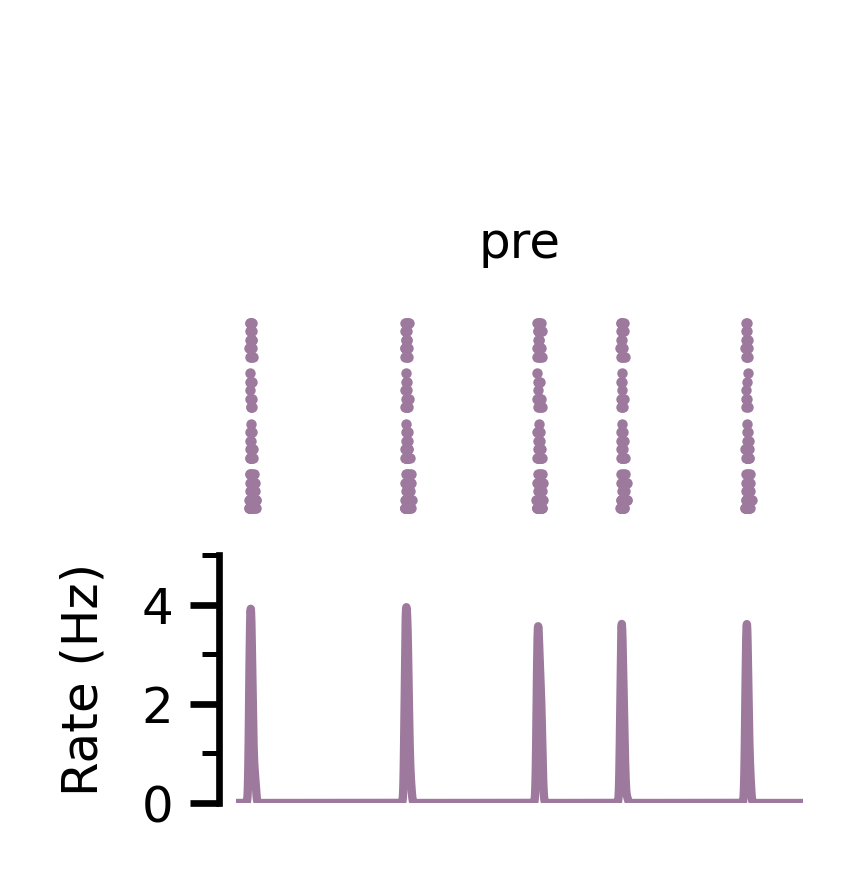

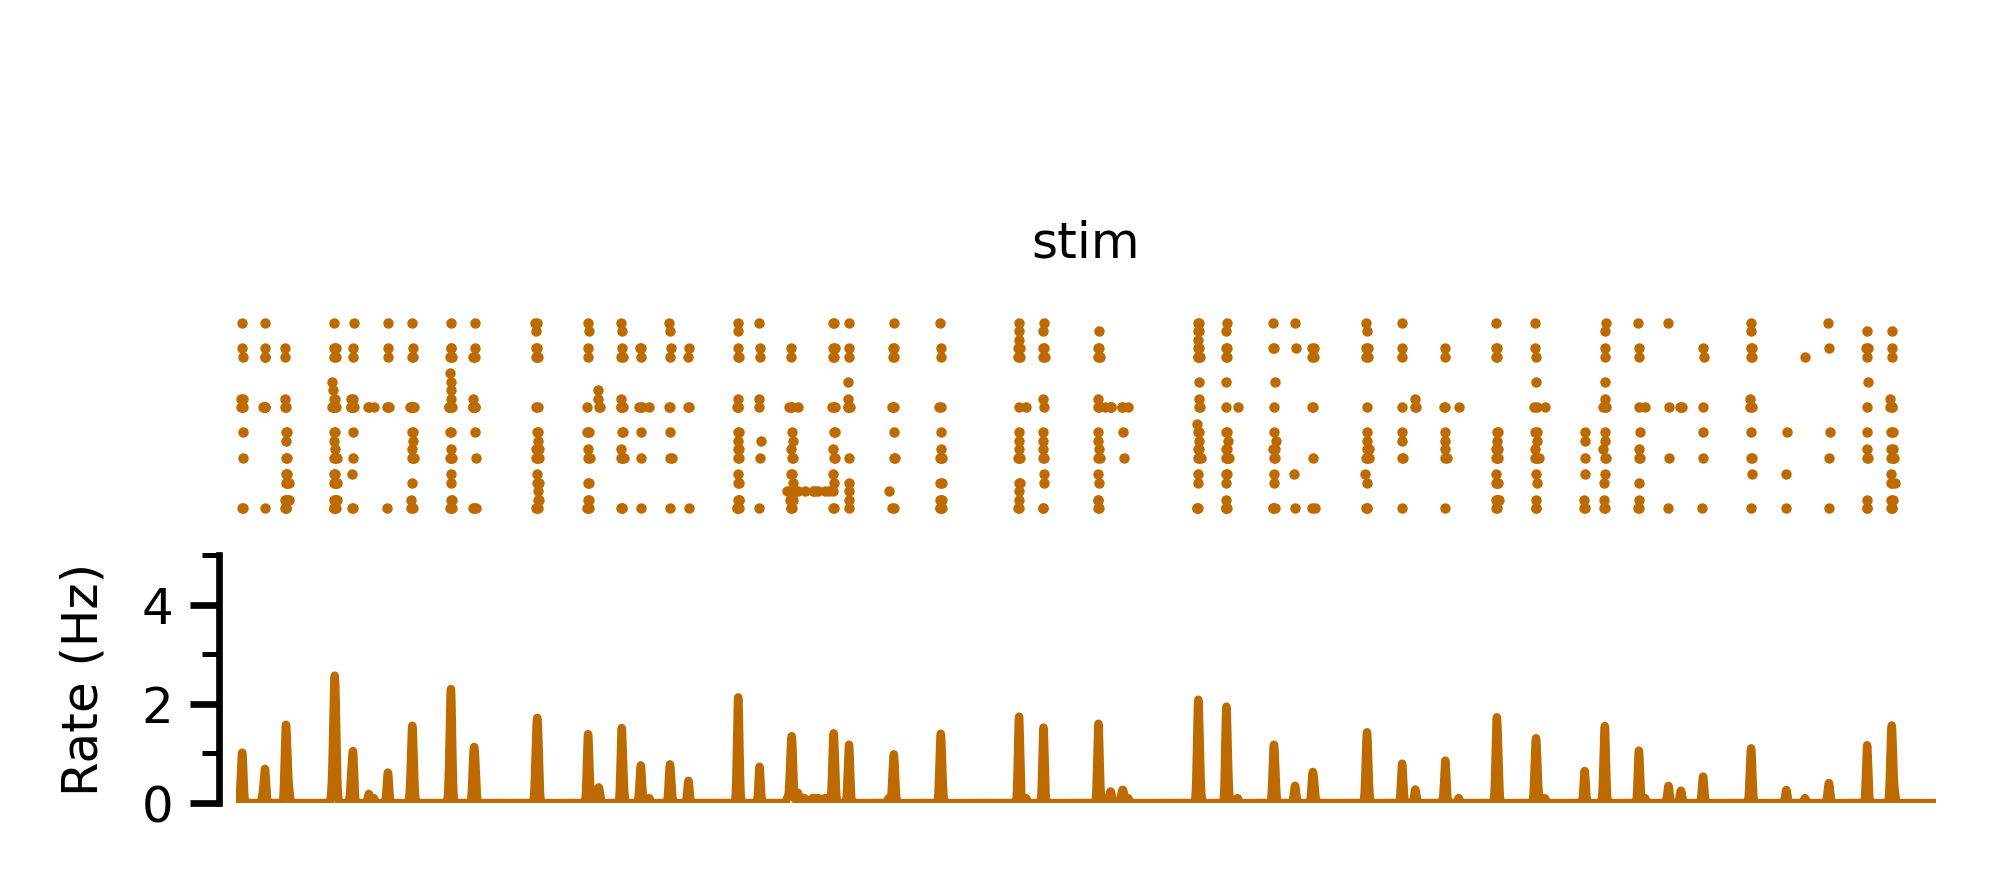

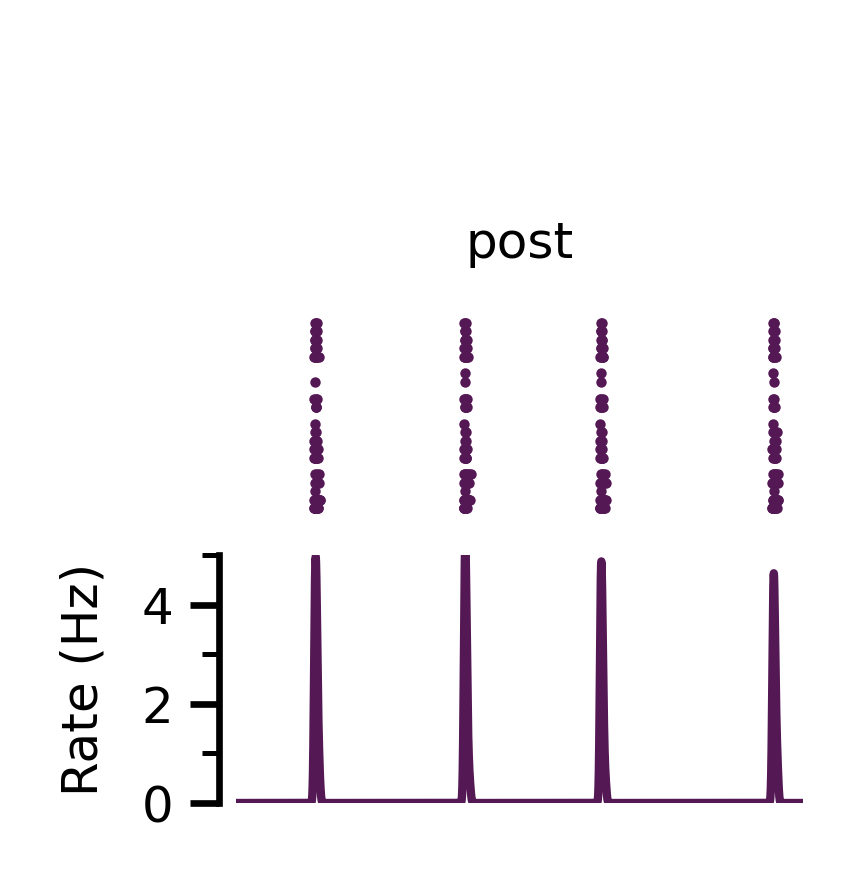

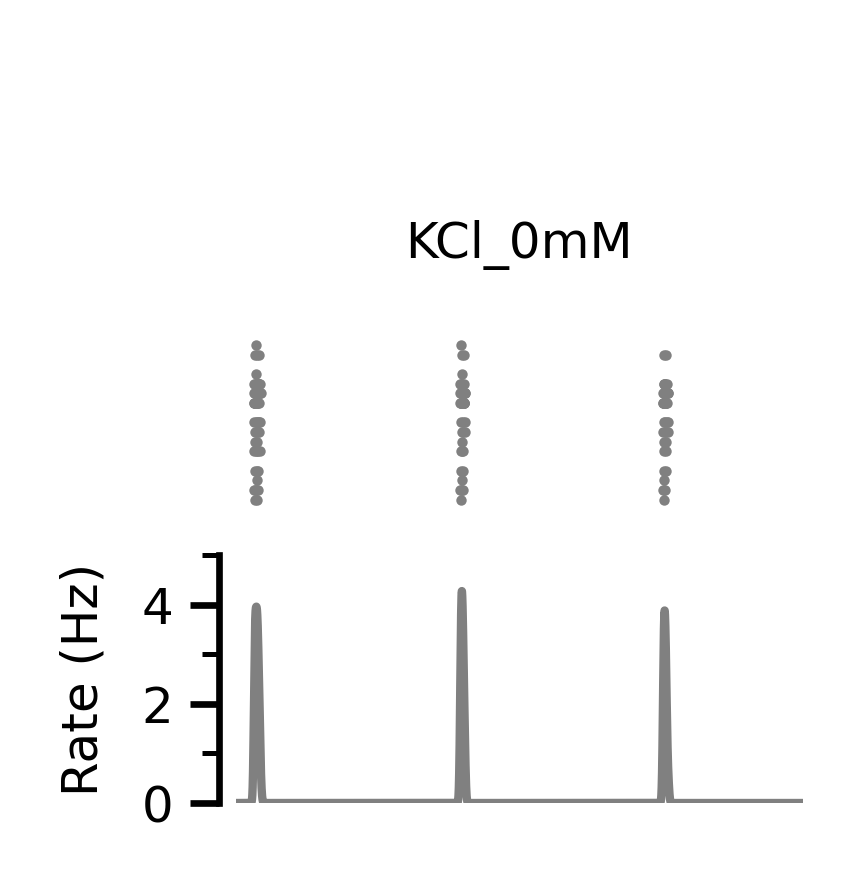

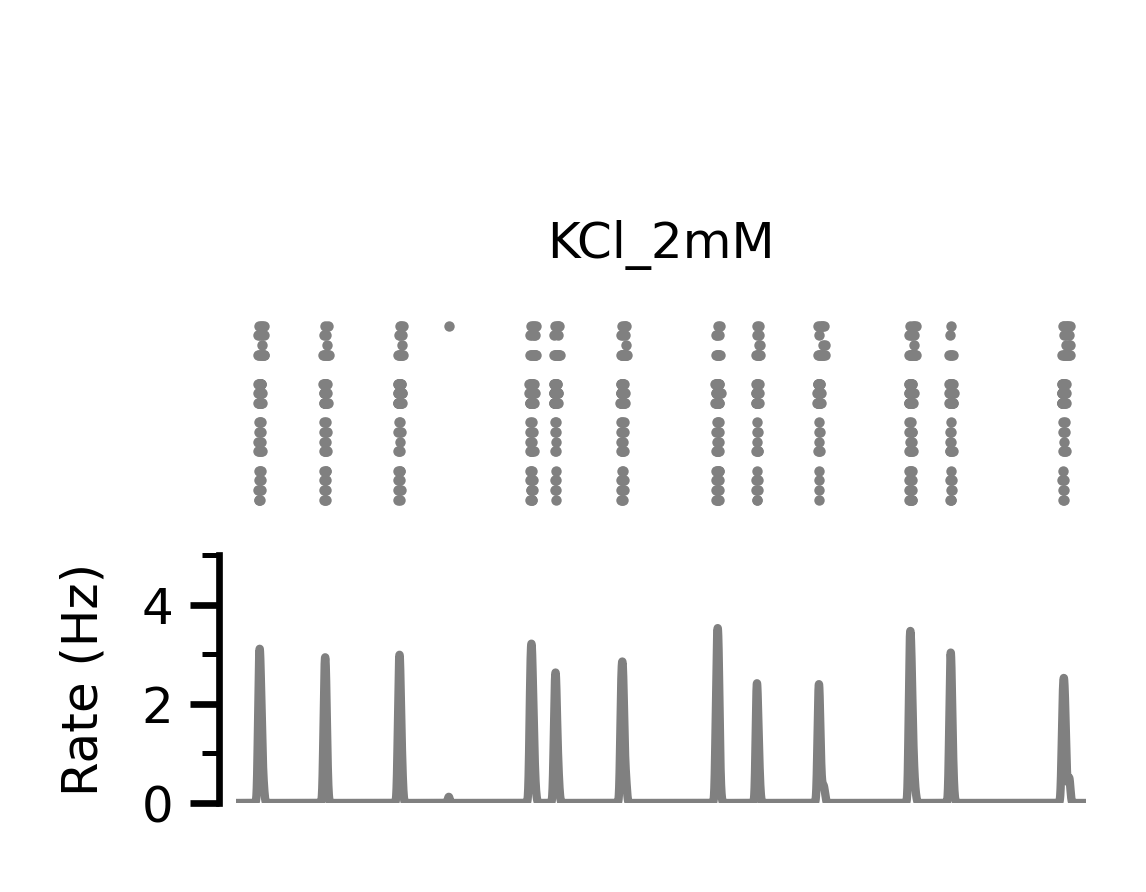

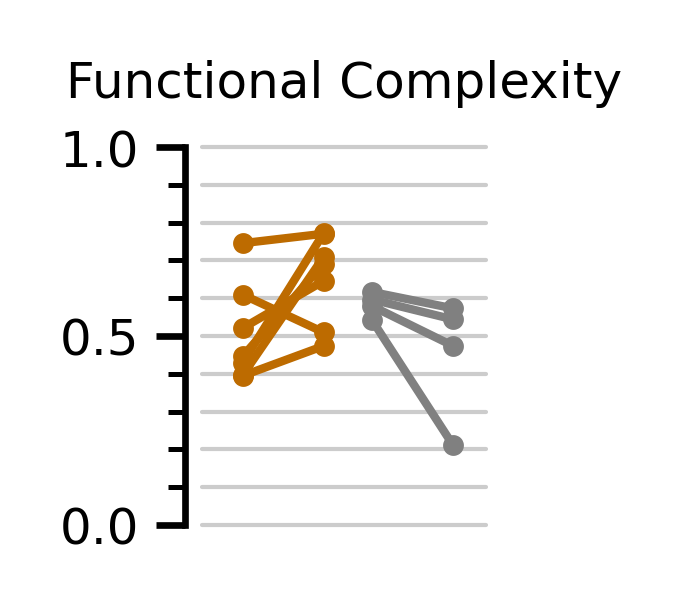

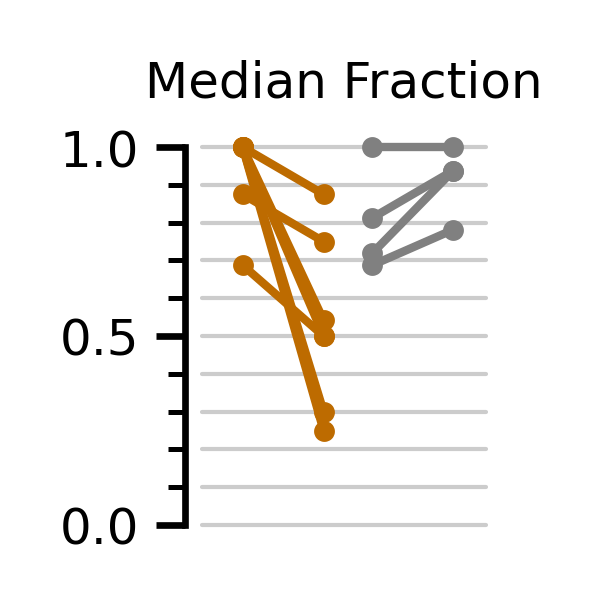

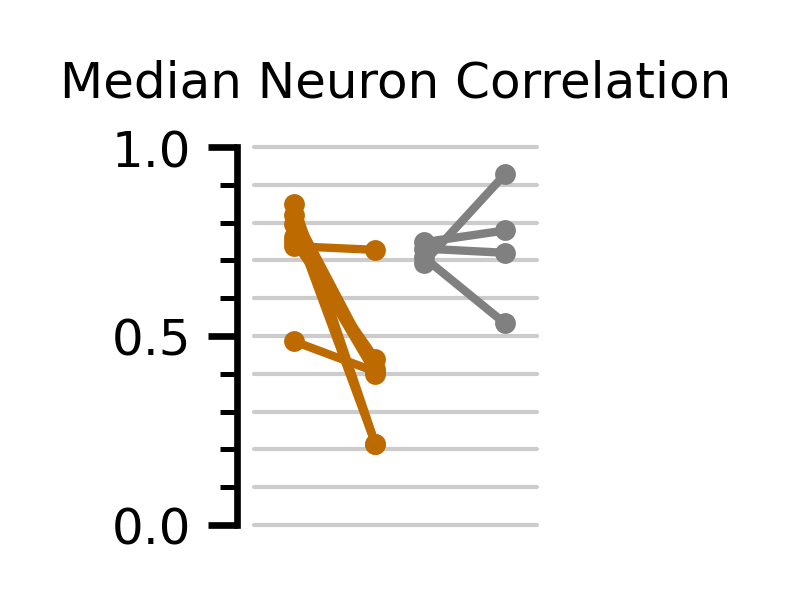

In [3]:
# print(pp.fig_1.__doc__)
pp.show_ylabel = True
pp.show_title = True
pp.fig_1()

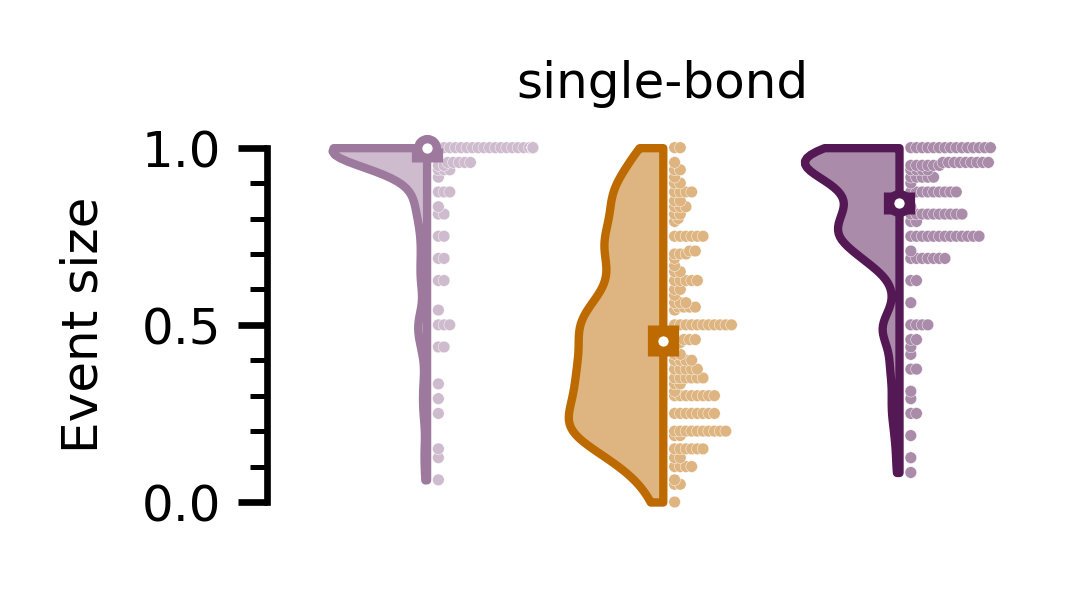

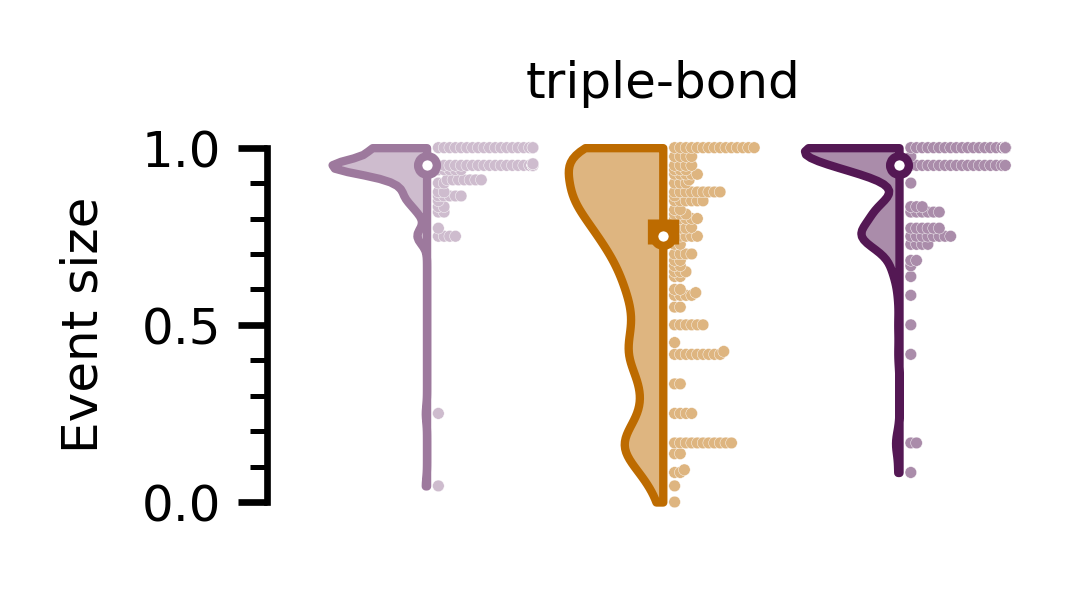

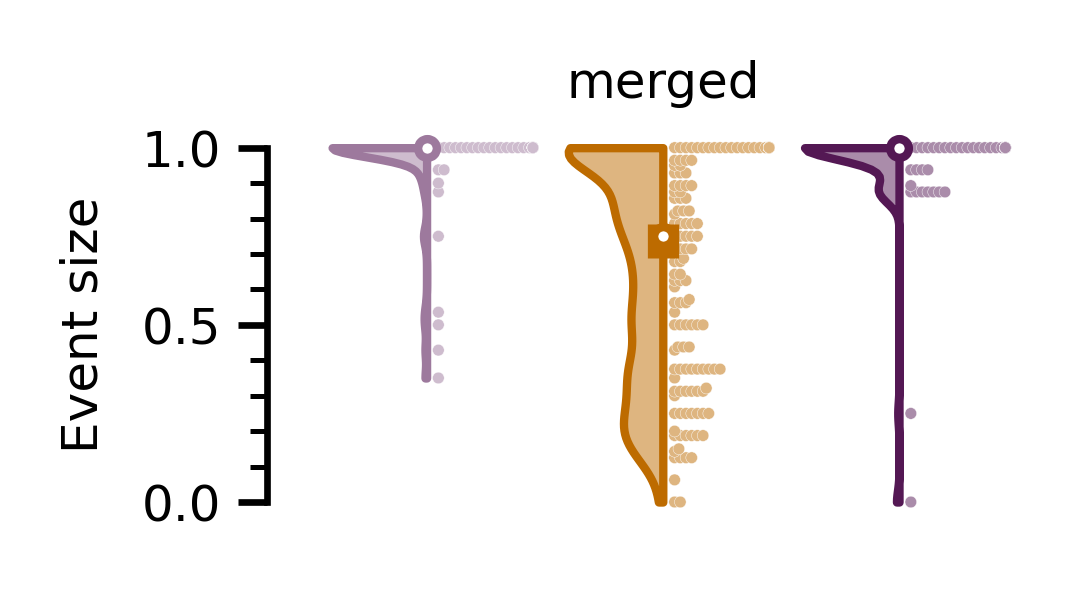

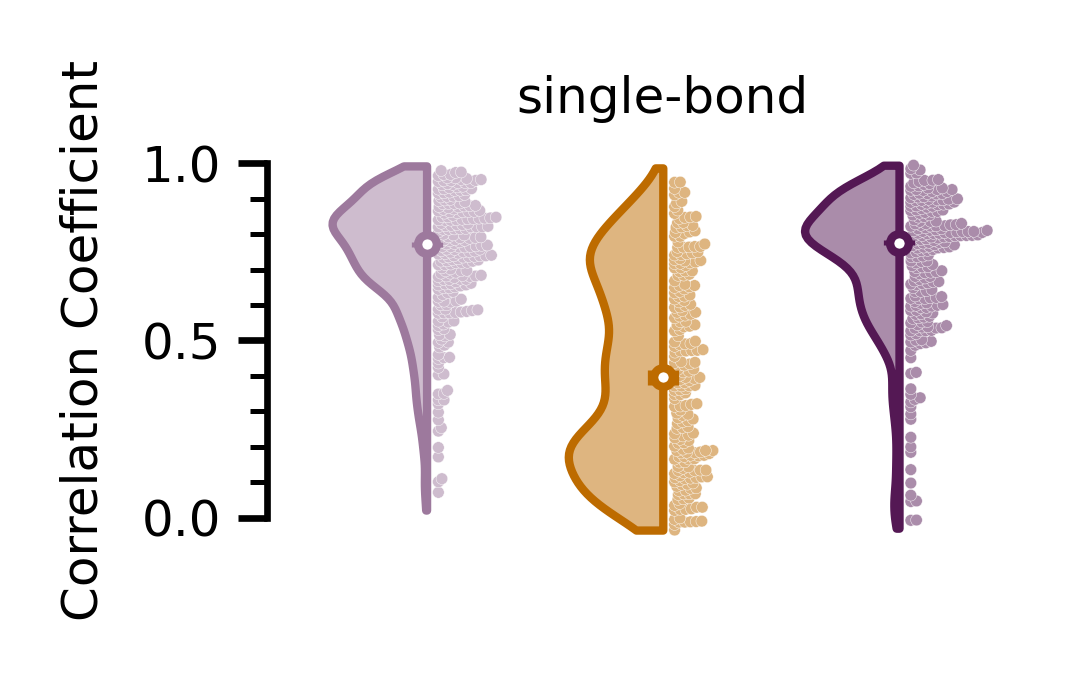

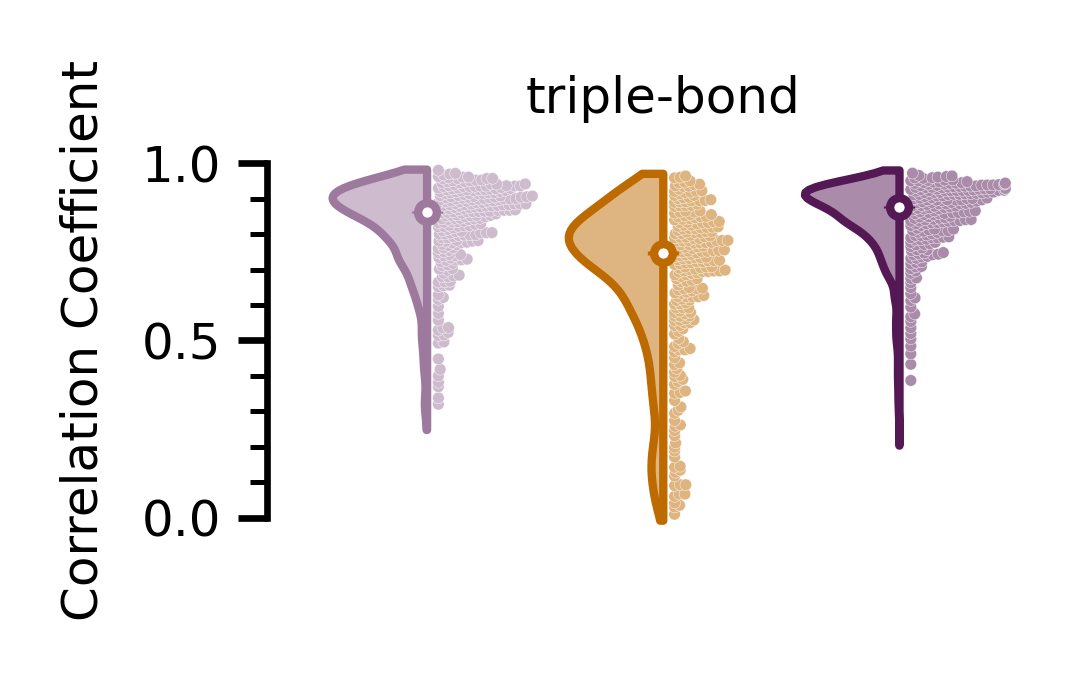

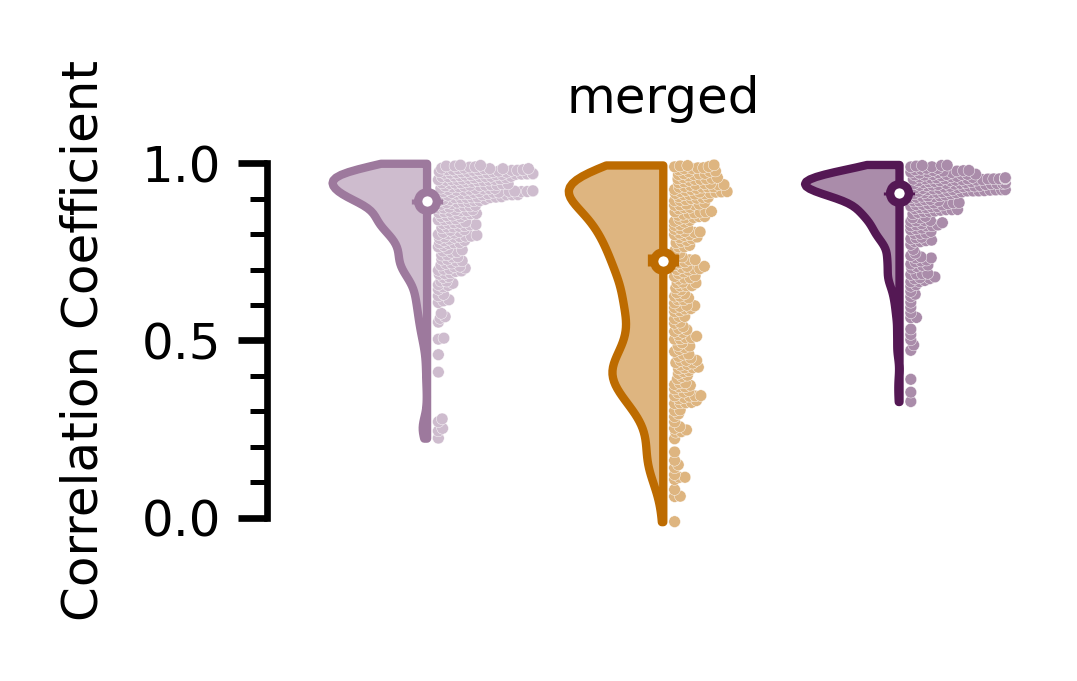

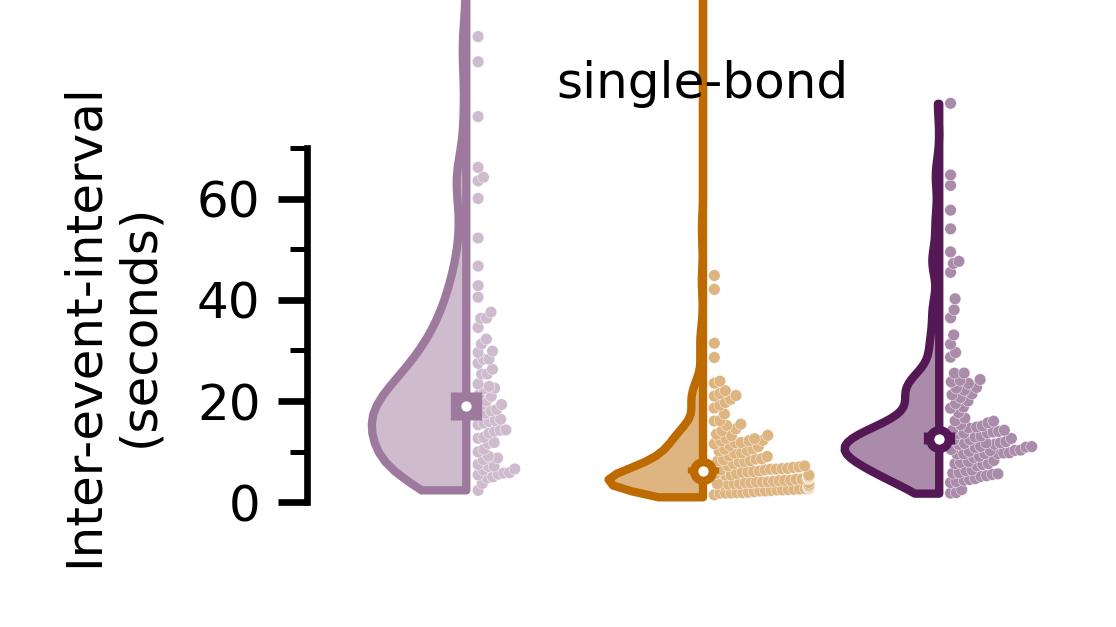

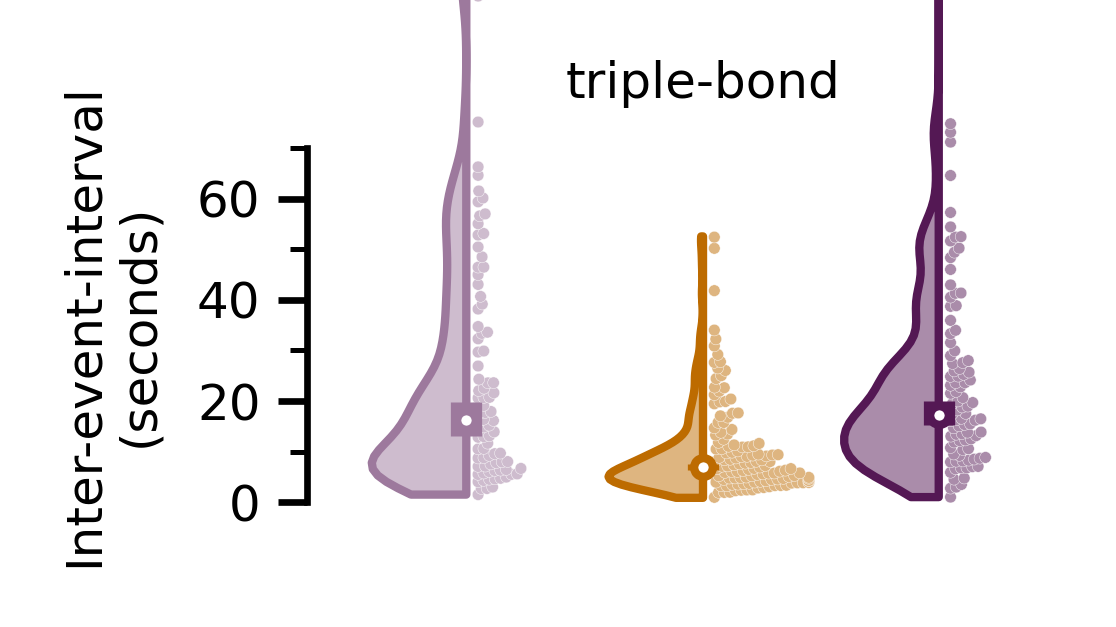

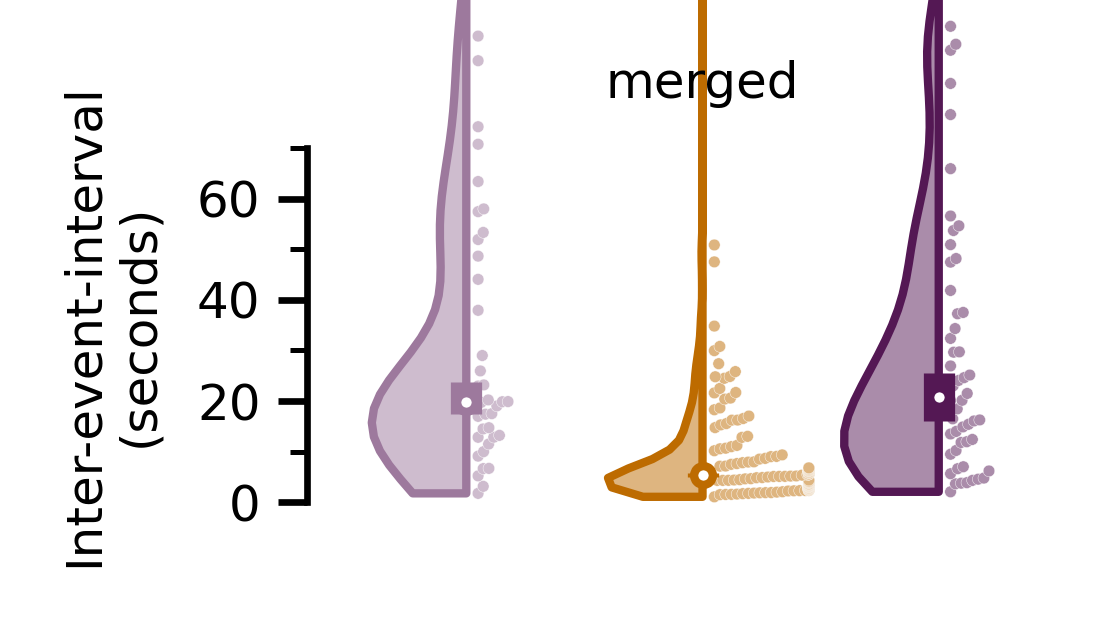

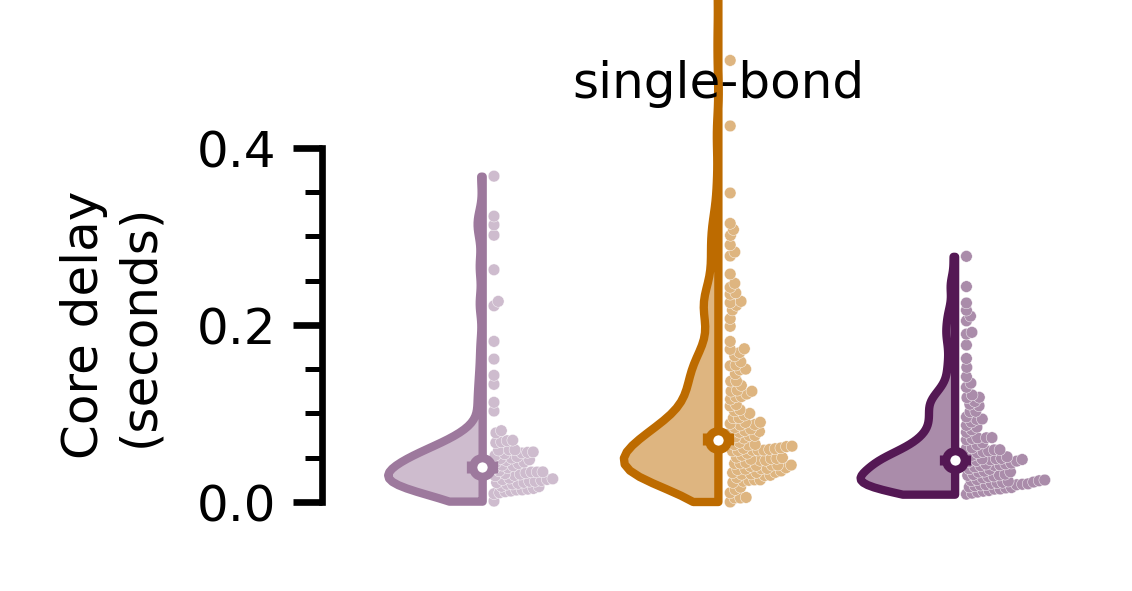

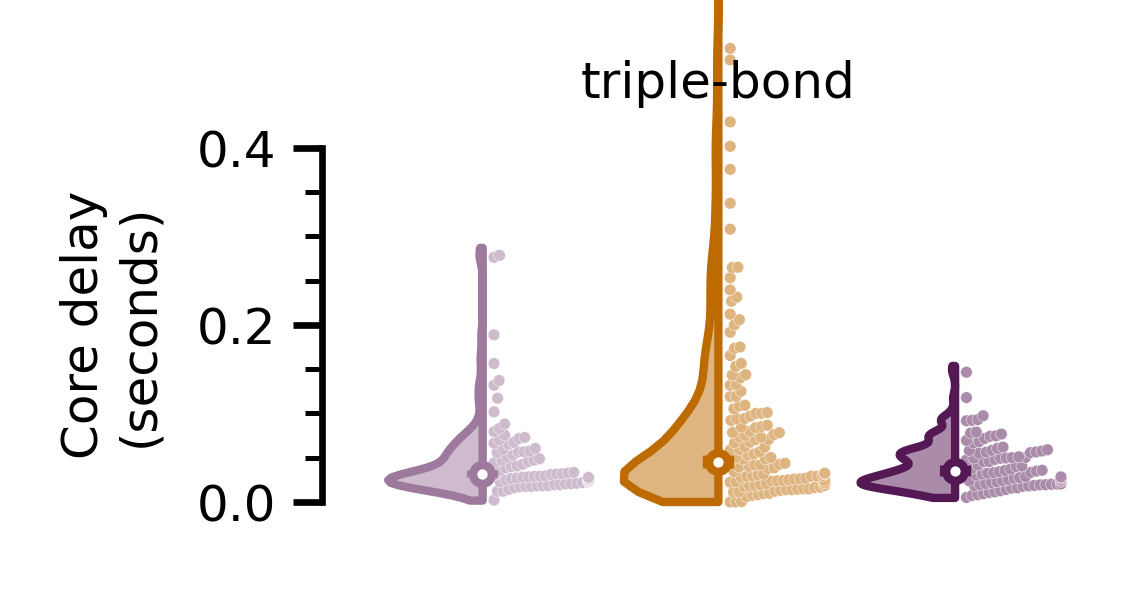

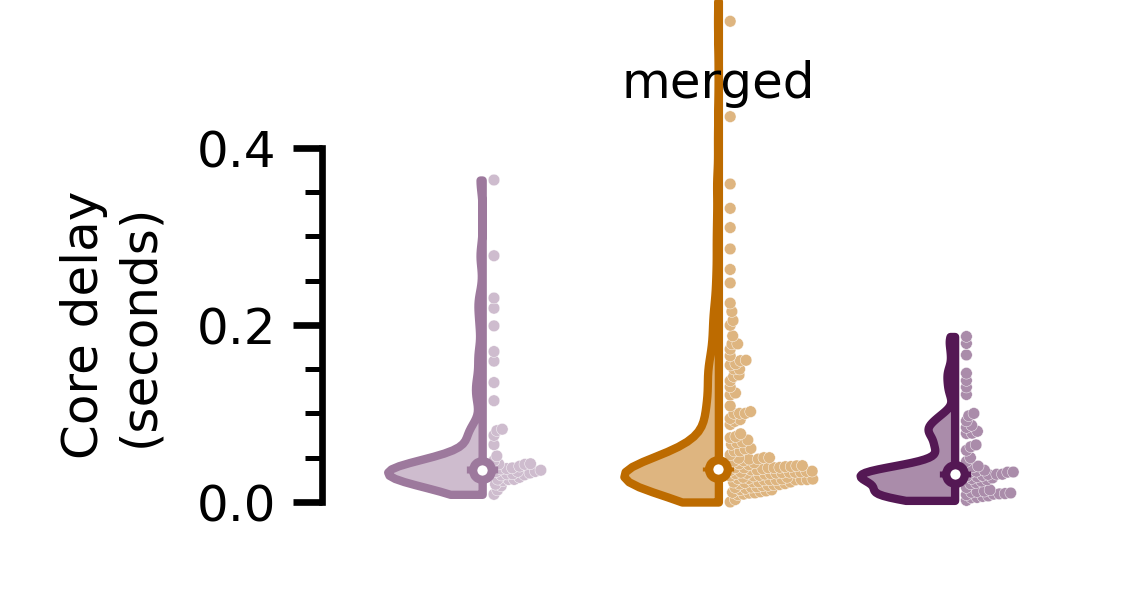

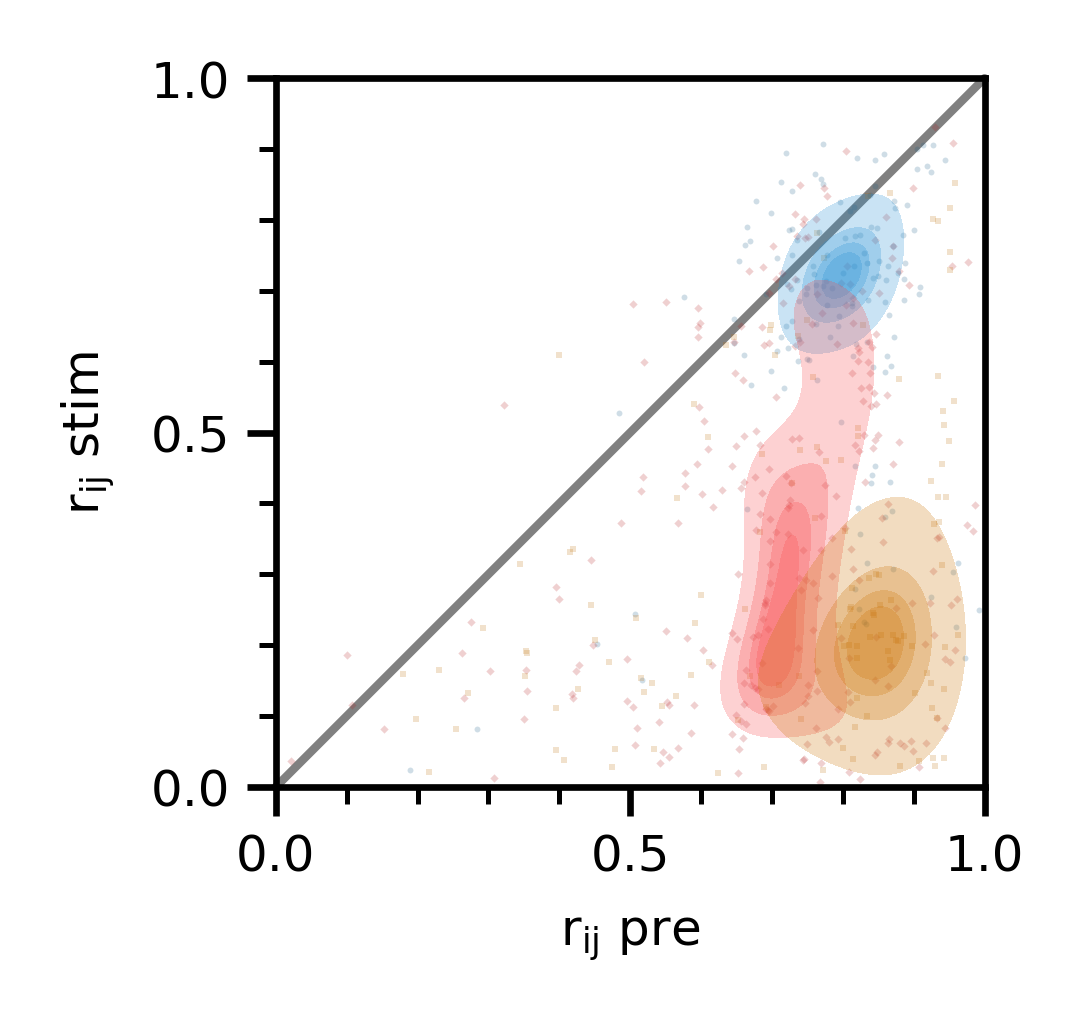

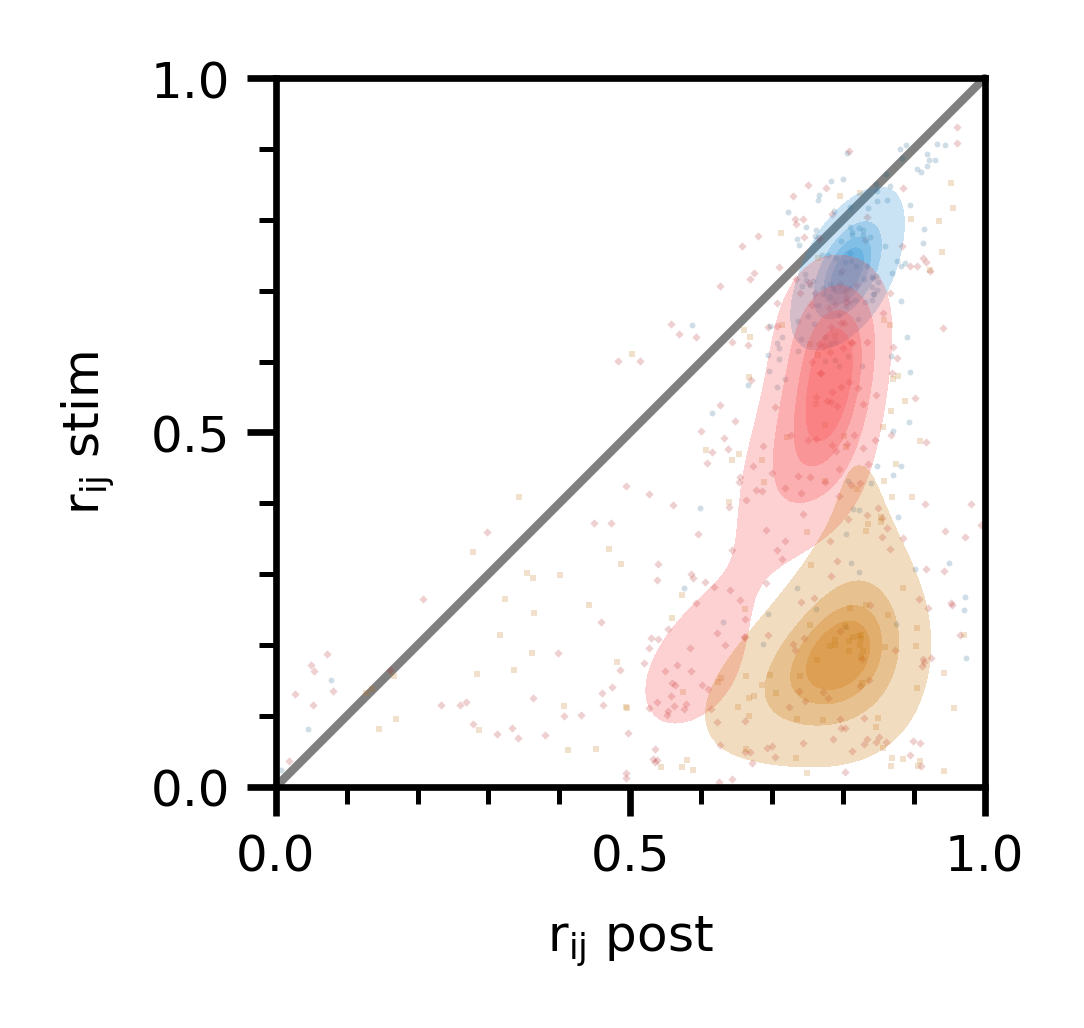

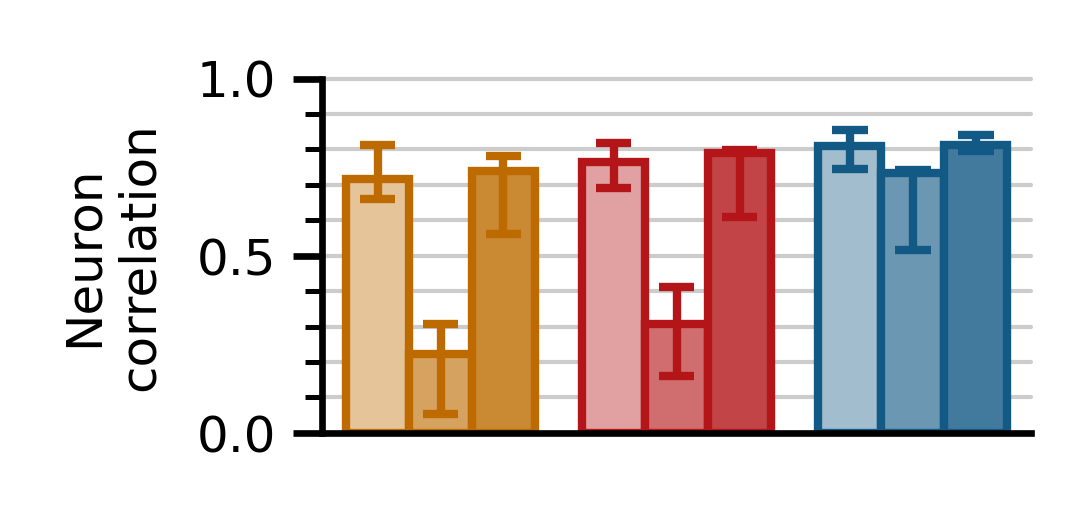

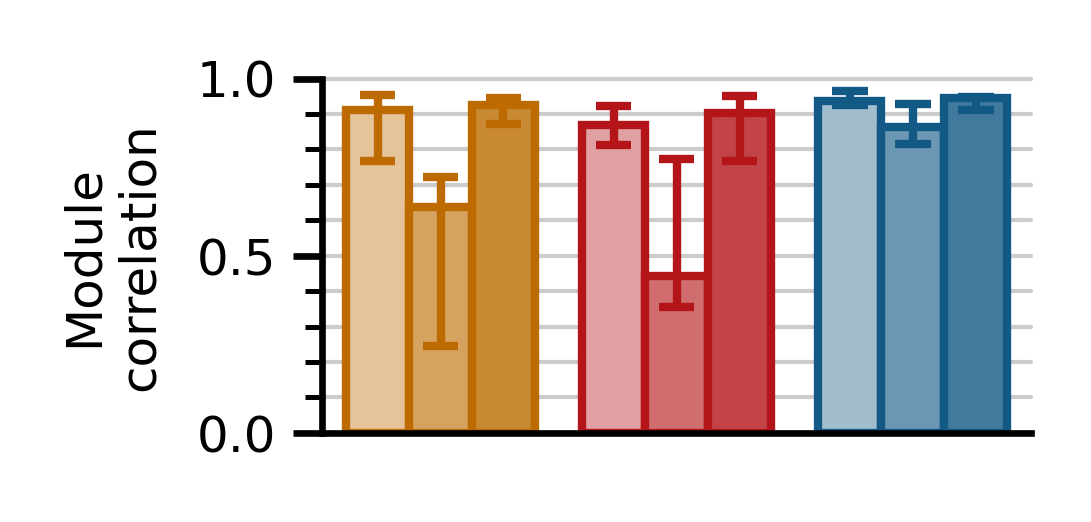

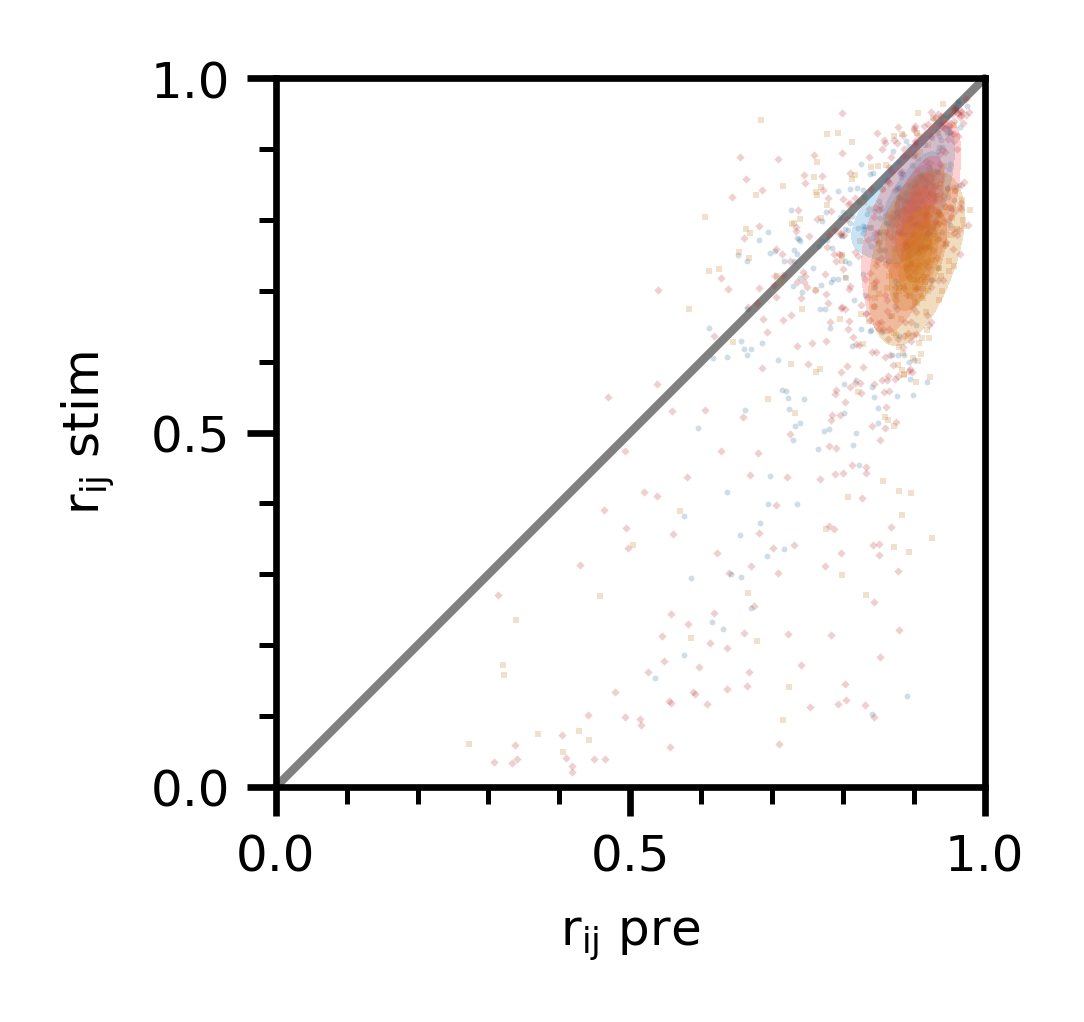

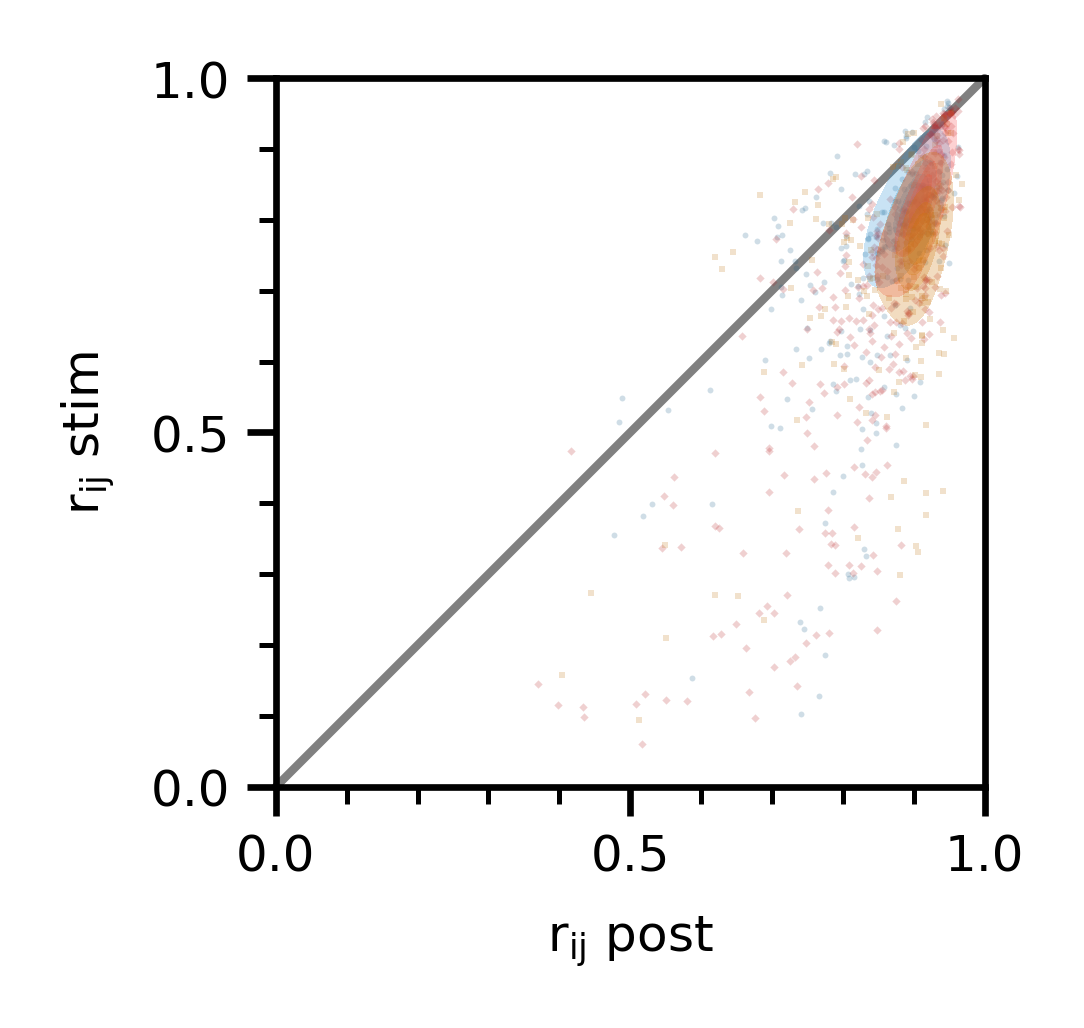

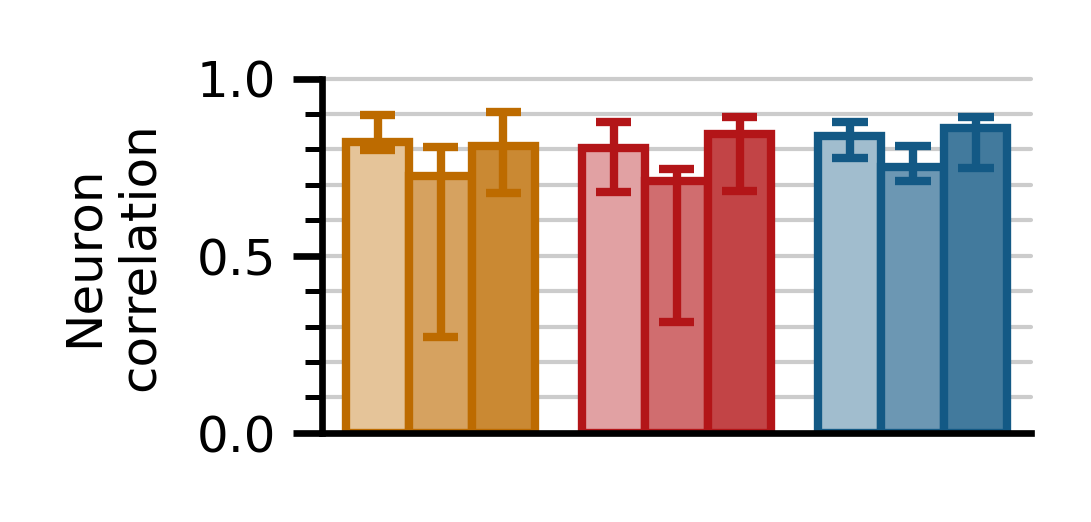

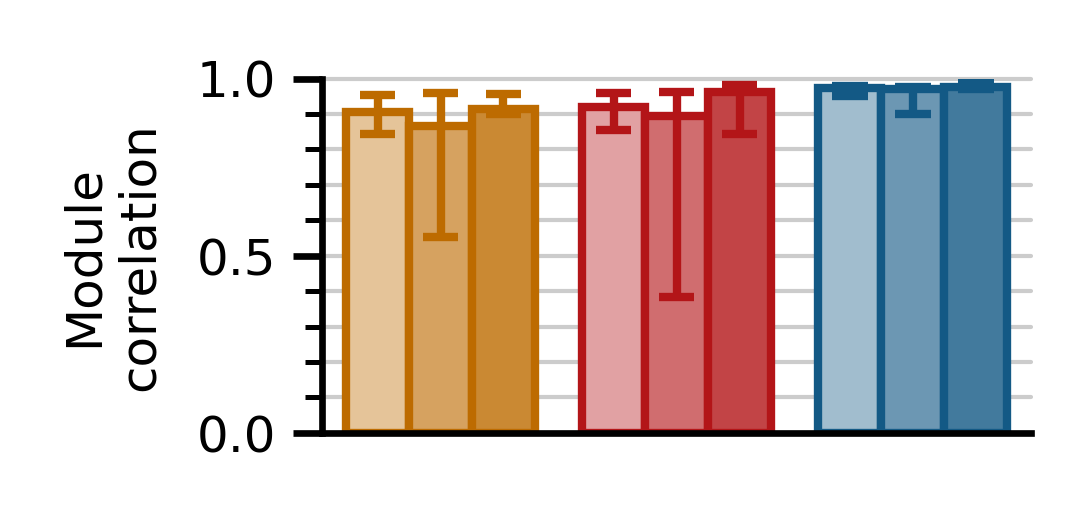

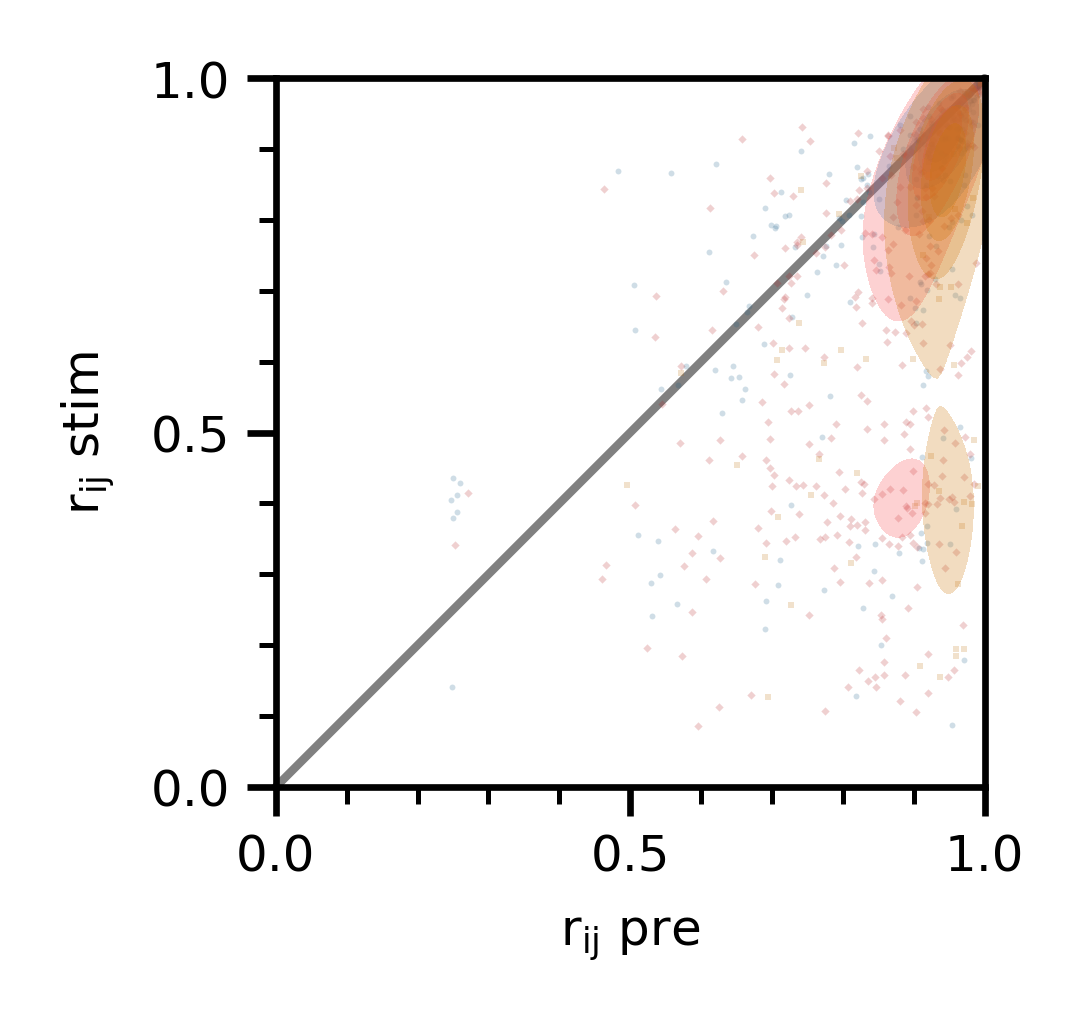

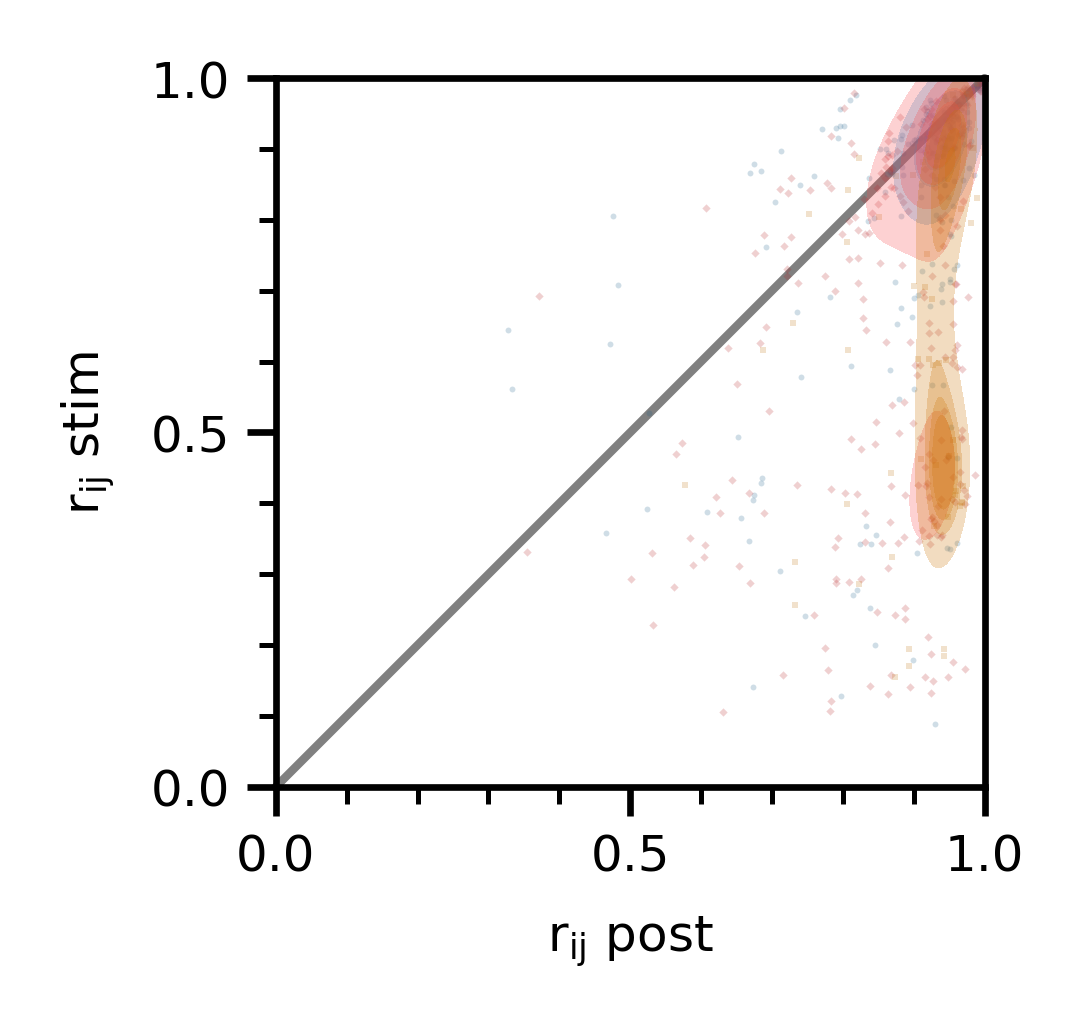

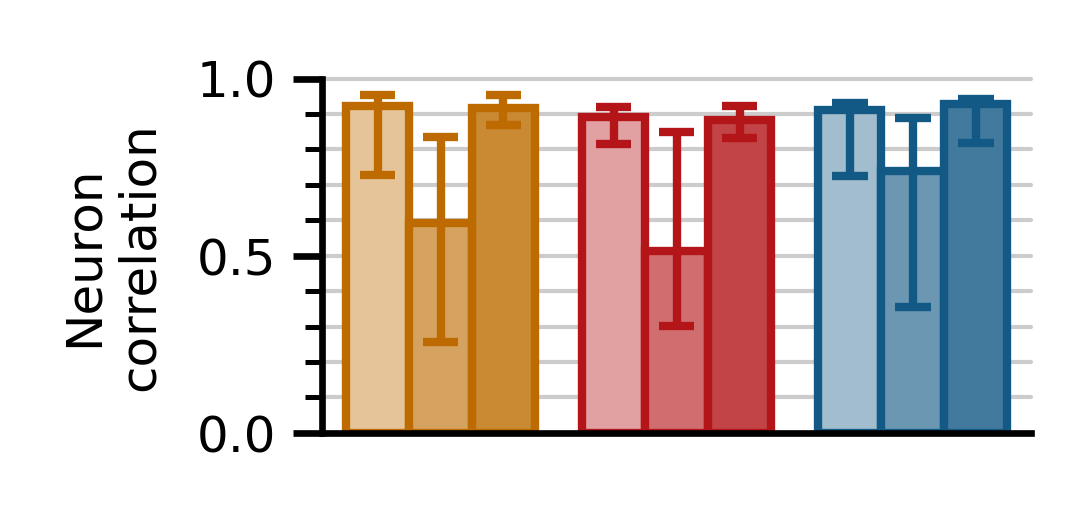

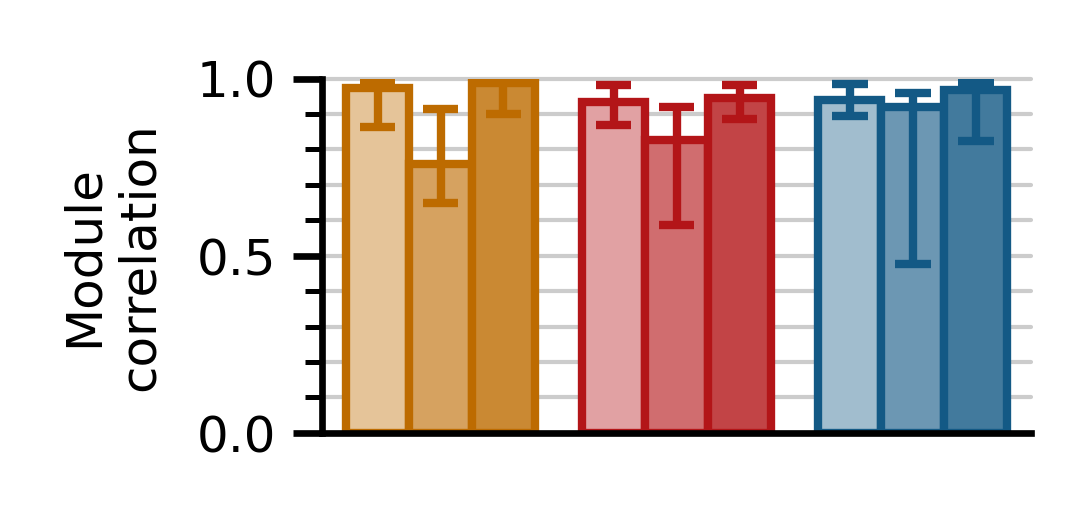

In [5]:
# print(pp.fig_2.__doc__)
pp.log.setLevel("ERROR")
pp.show_xlabel = False
pp.show_ylabel = True
pp.show_title = True
pp.fig_2(
    pd_folder = f"{pp.p_exp}/processed",
    out_prefix = f"{pp.p_fo}/exp_f2_",
)

In [52]:
# table s5
df = pp.table_for_violins()
# we want core delay in miliseconds
df["Core delays (ms)"] = df["Core delays"].apply(lambda x: x * 1000)
df = df.drop("Core delays", axis=1)

df.to_excel(f"{pp.p_exp}/processed/fig_2_table_violins.xlsx", engine="openpyxl")
df.to_latex(
    f"{pp.p_exp}/processed/fig_2_table_violins.tex",
    na_rep="",
    bold_rows=False,
    multirow=True,
    multicolumn=True,
    float_format="{:3.2f}".format,
)
df

layouts: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]


Event size Correlation Coefficient  \
layout      condition     percentile                                      
single-bond pre           50                1.0                0.771332   
                          2.5          0.958333                0.763512   
                          97.5              1.0                0.780234   
            stim          50           0.458333                0.396594   
                          2.5          0.416667                0.377623   
                          97.5              0.5                0.415919   
            post          50           0.833333                 0.77516   
                          2.5            0.8125                0.768086   
                          97.5            0.875                0.782798   
tripe-bond  pre           50               0.95                0.863152   
                          2.5              0.95                0.859824   
                          97.5             0.95                0.867317   
            stim          50               0.75                0.746743   
                          2.5          0.727273                0.740251   
                          97.5              0.8                0.752229   
            post          50               0.95                0.877742   
                          2.5              0.95                0.874258   
                          97.5             0.95                  0.8806   
merged      pre           50                1.0                0.893924   
                          2.5               1.0                0.885263   
                          97.5              1.0                0.898662   
            stim          50               0.75                0.724848   
                          2.5          0.678571                0.709456   
                          97.5         0.785714                 0.74604   
            post          50                1.0                0.916268   
                          2.5               1.0                0.911373   
                          97.5              1.0                 0.91897   
chem        KCl_0mM       50             0.8125                0.722158   
                          2.5              0.75                0.707417   
                          97.5            0.875                0.736611   
            KCl_2mM       50             0.9375                0.760638   
                          2.5             0.875                0.733314   
                          97.5           0.9375                0.780212   
bic         spon_Bic_20uM 50                1.0                0.818424   
                          2.5          0.846591                 0.80352   
                          97.5              1.0                0.840147   
            stim_Bic_20uM 50                0.8                0.818023   
                          2.5               0.8                0.801165   
                          97.5             0.85                0.831283   
simulation  0.0 Hz        50            0.89375                0.870086   
                          2.5           0.86875                0.866769   
                          97.5            0.925                0.873056   
            20.0 Hz       50            0.28125                0.589209   
                          2.5             0.275                0.580504   
                          97.5           0.2875                0.598466   

                                     Inter-event-interval  Core delays (ms)  
layout      condition     percentile                                         
single-bond pre           50                      18.9695         39.166667  
                          2.5                     16.1465         32.833333  
                          97.5                     21.346         45.262500  
            stim          50                        6.229         70.000000  
                          2.5              

In [62]:
# table s4
df = pp.table_for_rij()
df.to_excel(f"{pp.p_exp}/processed/fig_2_table_rij_barplots.xlsx", engine="openpyxl")
df.to_latex(
    f"{pp.p_exp}/processed/fig_2_table_rij_barplots.tex",
    na_rep="",
    bold_rows=False,
    multirow=True,
    multicolumn=True,
    float_format="{:3.2f}".format,
)
df

layouts: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


within_stim    across within_nonstim       all
layout      condition kind                                                 
single-bond pre       median    0.716375  0.764755       0.808187  0.763277
                      2.5       0.661288  0.691218       0.745105  0.737583
                      97.5      0.812874  0.816923       0.854195  0.820547
            stim      median    0.223077  0.307549       0.733659   0.40565
                      2.5       0.052878   0.16064       0.514901  0.214697
                      97.5      0.307116  0.412317       0.742291  0.440488
            post      median    0.738912  0.789355       0.811196  0.805589
                      2.5       0.560998  0.609077       0.795686  0.728649
                      97.5      0.781249  0.799145       0.841442  0.811925
tripe-bond  pre       median    0.820559  0.803559       0.837221  0.808073
                      2.5       0.798556  0.680635       0.775682  0.776255
                      97.5      0.897231  0.877785       0.876894  0.879449
            stim      median    0.724396  0.711953        0.75155  0.729788
                      2.5       0.270571   0.31222       0.709344  0.456632
                      97.5      0.807262  0.744089       0.808944  0.756982
            post      median    0.809864  0.843992       0.860504  0.851372
                      2.5       0.677656  0.681108       0.748003   0.71576
                      97.5      0.904928  0.892356       0.892146  0.893913
merged      pre       median    0.921147  0.890135       0.910903   0.91098
                      2.5        0.72708  0.813834       0.724308  0.788529
                      97.5      0.953554  0.919328       0.931824  0.923724
            stim      median    0.592889  0.513482       0.739574  0.619295
                      2.5       0.256488  0.300744       0.355454   0.28225
                      97.5      0.836294  0.849315       0.888823  0.866807
            post      median    0.915621    0.8829       0.926956  0.909518
                      2.5       0.868035  0.832461       0.816907  0.853851
                      97.5      0.953302  0.923741       0.940876  0.927376
simulation  0.0 Hz    median    0.859354  0.836284       0.866967   0.87088
                      2.5       0.837025  0.773145       0.786704  0.804809
                      97.5      0.908947  0.878787       0.888221    0.8813
            20.0 Hz   median     0.42619  0.519169       0.833433  0.601217
                      2.5       0.369684  0.441456       0.763621  0.515733
                      97.5      0.465676  0.584619       0.866553  0.660884

## Supplemental Material and Statistical Tests

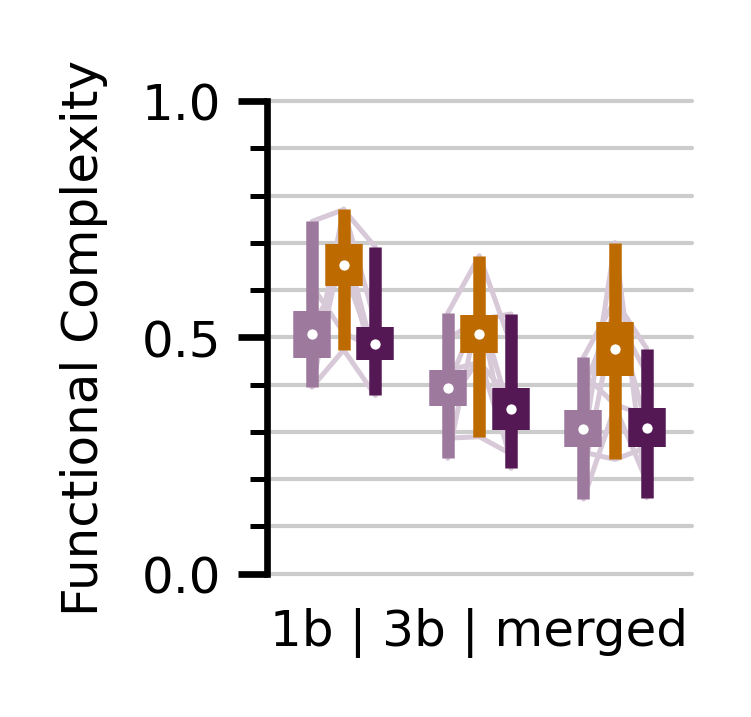

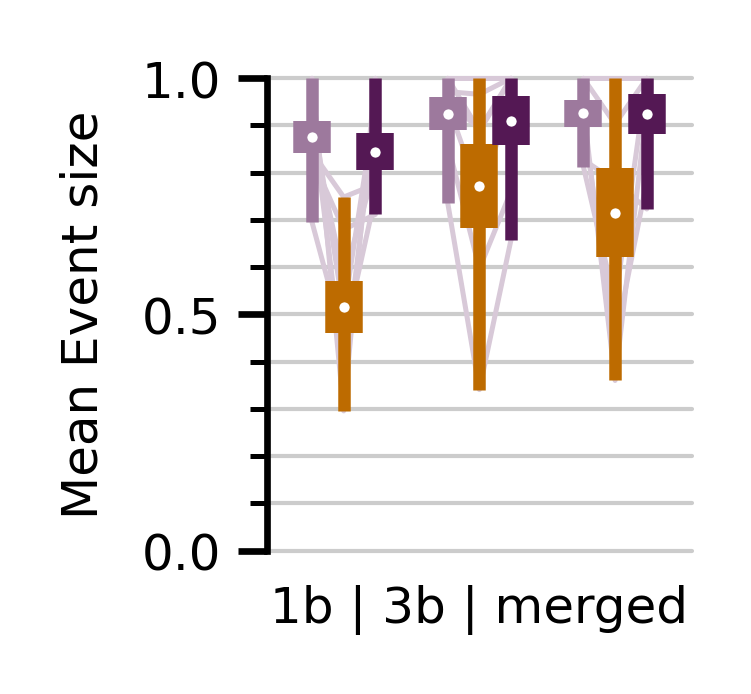

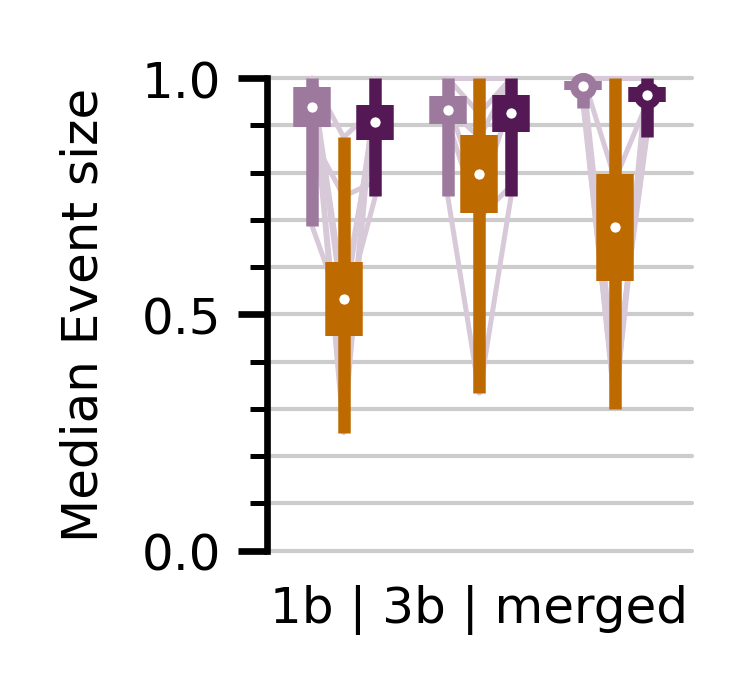

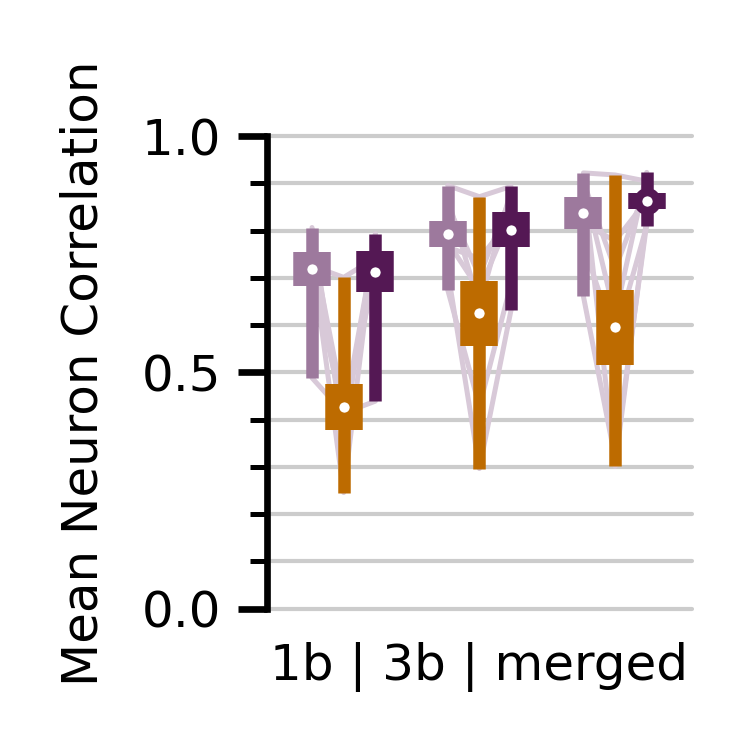

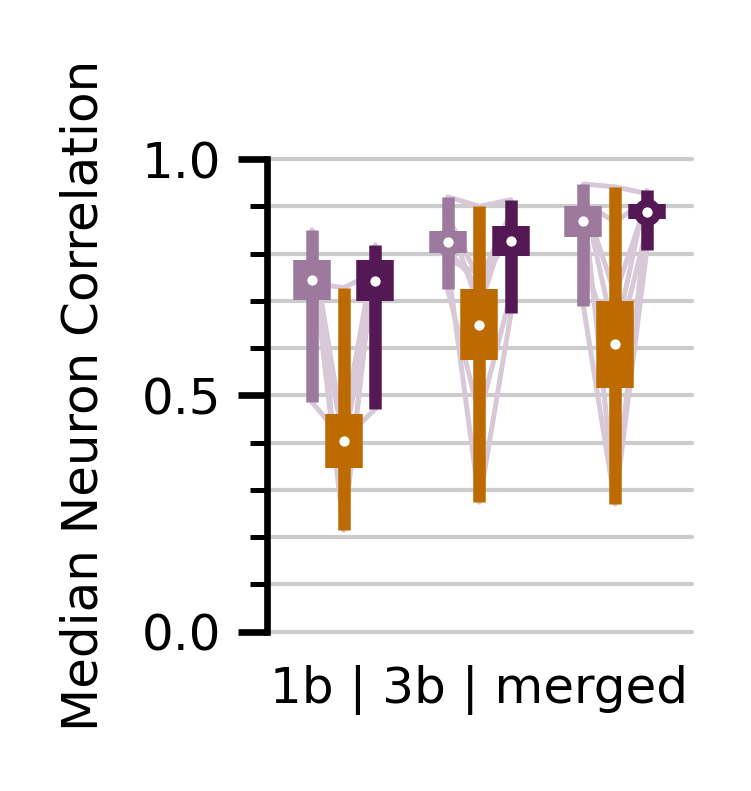

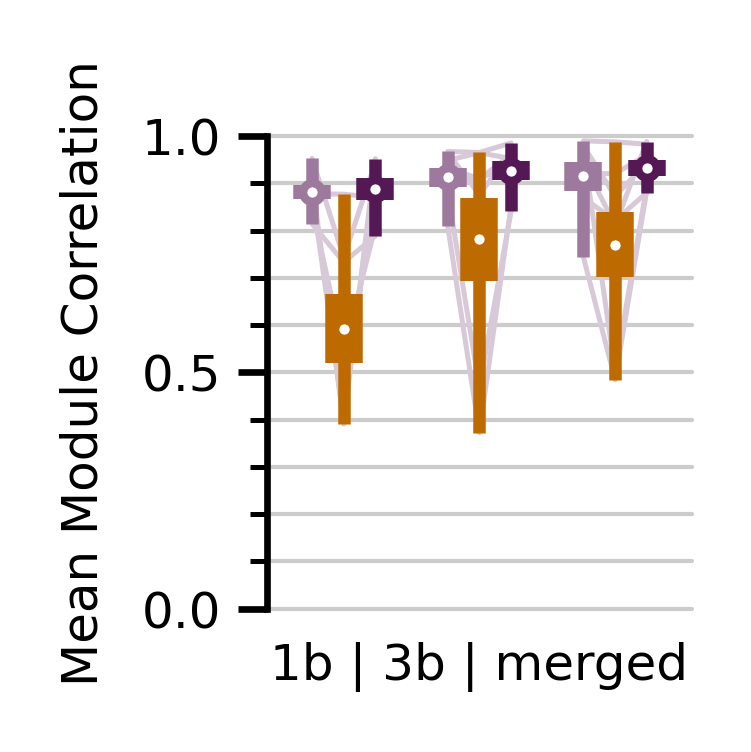

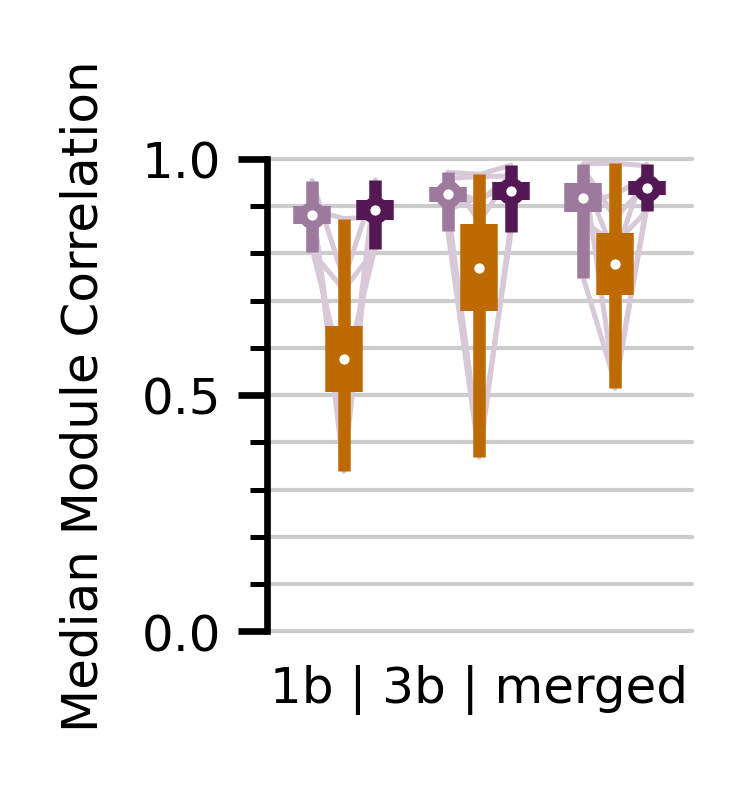

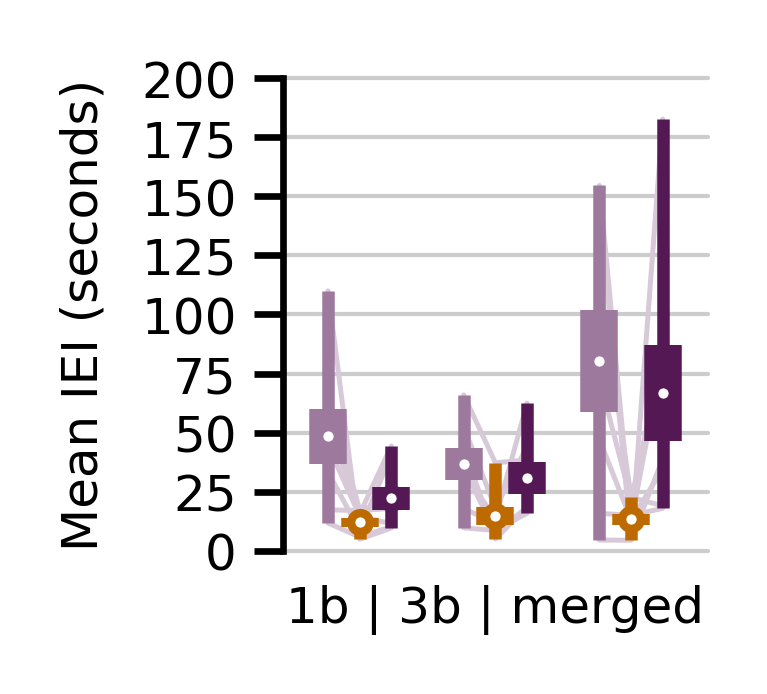

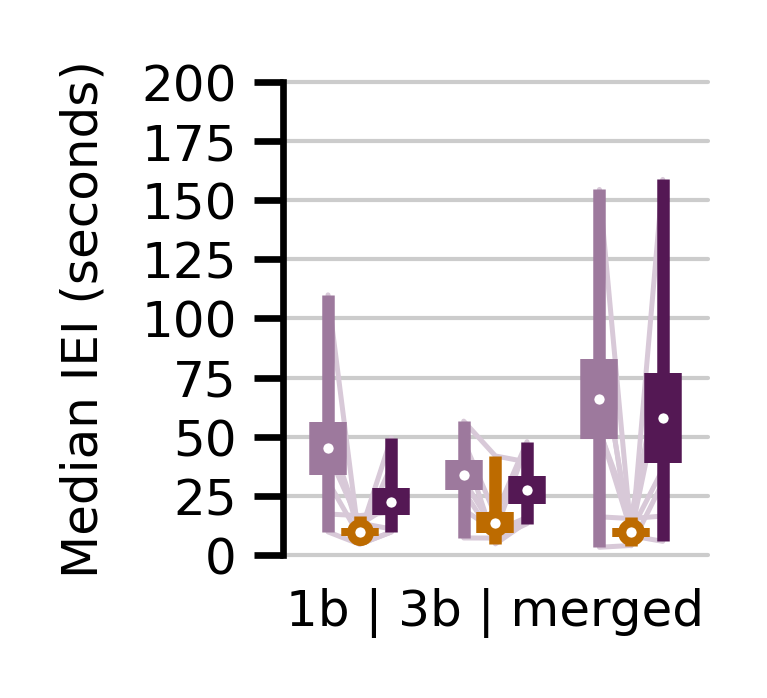

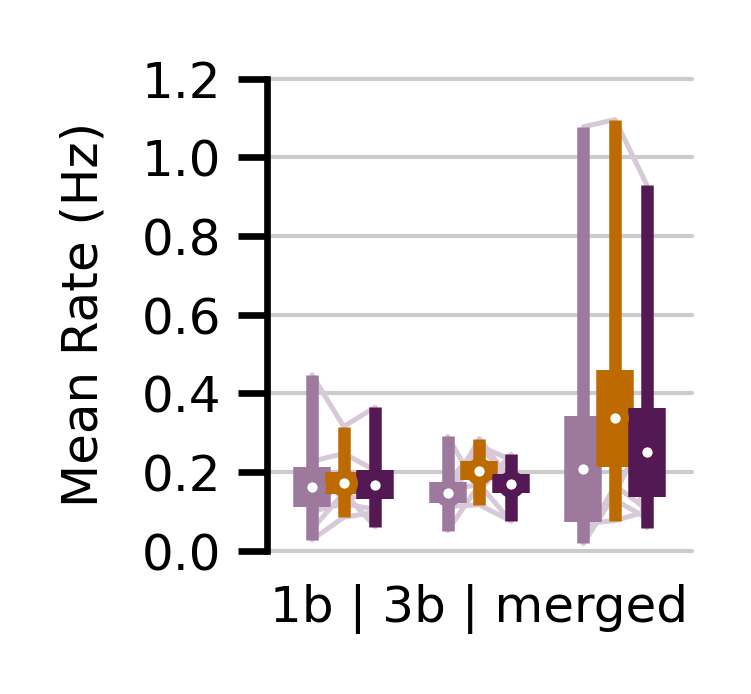

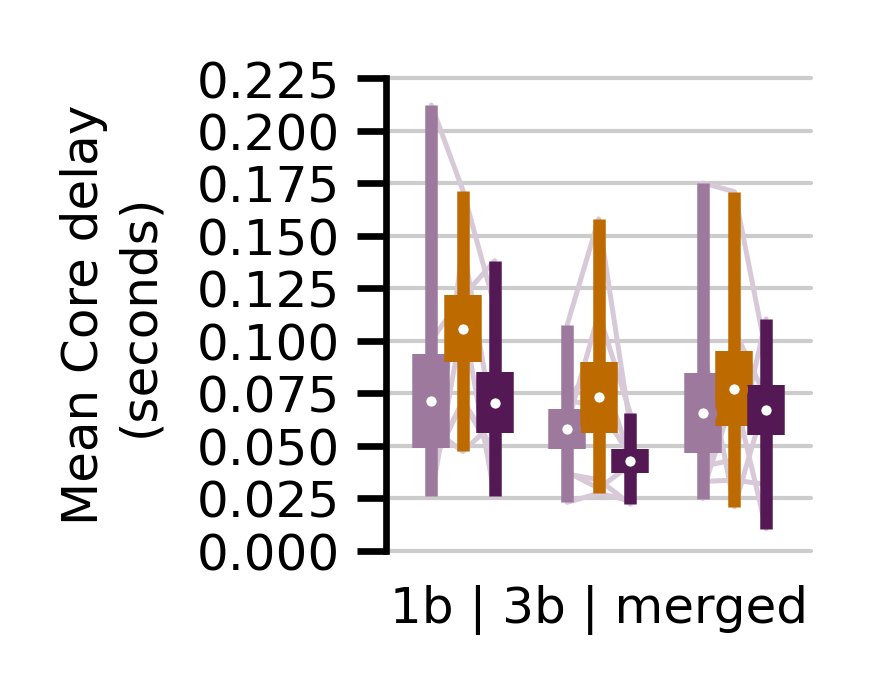

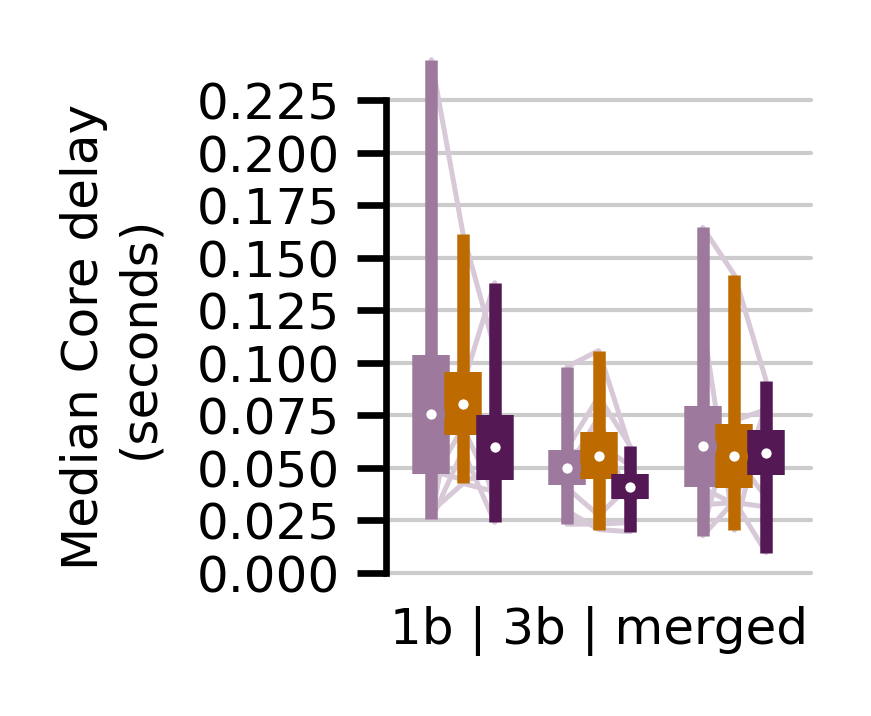

In [48]:
# print(pp.fig_sm_exp_trialwise_observables.__doc__)
pp.log.setLevel("ERROR")
pp.show_xlabel = True
pp.show_ylabel = True
pp.show_title = False
pp.fig_sm_exp_trialwise_observables(
    pd_folder=f"{pp.p_exp}/processed",
    out_prefix=f"{pp.p_fo}/exp_sr_rij500_",
)


In [70]:
# table s6
df = pp.table_for_trials()
# add the number of trials of the trial data frame to the layout description
df = df.reset_index()
df["layout"] = df["layout"] + " ($N=" + df["trials"].map(str) + "$ realizations)"
df = df.drop("trials", axis=1)
df = df.set_index(["layout", "condition", "kind"])

df.to_excel(f"{pp.p_exp}/processed/fig_2_table_trial_estimates.xlsx", engine="openpyxl")
df.to_latex(
    f"{pp.p_exp}/processed/fig_2_table_trial_estimates.tex",
    na_rep="",
    bold_rows=False,
    multirow=True,
    multicolumn=True,
    float_format="{:3.2f}".format,
)
df

layouts: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]


Event size  \
layout                            condition     kind              
single-bond ($N=7.0$ repetitions) pre           mean    0.98325   
                                                sem      0.0525   
                                                max         1.0   
                                                min      0.6875   
                                  stim          mean   0.517667   
                                                sem    0.111369   
                                                max       0.875   
                                                min        0.25   
                                  post          mean   0.930296   
                                                sem    0.053655   
                                                max         1.0   
                                                min        0.75   
tripe-bond ($N=7.0$ repetitions)  pre           mean   0.960623   
                                                sem    0.041984   
                                                max         1.0   
                                                min        0.75   
                                  stim          mean   0.849738   
                                                sem    0.108327   
                                                max         1.0   
                                                min    0.333333   
                                  post          mean   0.966427   
                                                sem    0.065743   
                                                max         1.0   
                                                min        0.75   
merged ($N=7.0$ repetitions)      pre           mean     0.9949   
                                                sem    0.015556   
                                                max         1.0   
                                                min      0.9375   
                                  stim          mean   0.717043   
                                                sem    0.275886   
                                                max         1.0   
                                                min         0.3   
                                  post          mean   0.978321   
                                                sem    0.027929   
                                                max         1.0   
                                                min       0.875   
chem ($N=4.0$ repetitions)        KCl_0mM       mean      0.793   
                                                sem    0.080312   
                                                max         1.0   
                                                min      0.6875   
                                  KCl_2mM       mean   0.922844   
                                                sem    0.047621   
                                                max         1.0   
                                                min     0.78125   
bic ($N=5.0$ repetitions)         spon_Bic_20uM mean   0.898386   
                                                sem    0.155095   
                                                max         1.0   
                                                min        0.25   
                                  stim_Bic_20uM mean   0.875991   
                                                sem    0.162151   
                                                max         1.0   
                                                min        0.25   
simulation ($N=50.0$ repetitions) 0.0 Hz        mean   0.946591   
                                                sem    0.042026   
                                                max         1.0   
                                                min         0.3   
                                  20.0 Hz       mean   0.287934   
                                                sem    0.017161   
                                 

### NHST
Frequentist perspective, with Null-hypothesis of pre- and stim conditions being equal.
The table below contains p-values from two-sided, paired-sample t-tests
(corresponding to the stick-plots above)

In [58]:
# table s1
# the test results are logged at INFO level and
# returned as a pandas dataframe.
pp.log.setLevel("WARNING")
nhst_stats = pp.nhst_pairwise_for_trials(
    observables=[
        "Mean Rate",
        "Median Fraction", # this is the event size
        "Median Neuron Correlation",
        "Functional Complexity",
        "Mean IBI",
        "Mean Core delays",
    ],
    layouts=["1b", "3b", "merged", "KCl_1b"],
)

nhst_stats.to_excel(f"{pp.p_exp}/processed/fig_2_table_pvals.xlsx", engine="openpyxl")
nhst_stats.to_latex(
    f"{pp.p_exp}/processed/fig_2_table_pvals.tex",
    na_rep="",
    bold_rows=False,
    multirow=True,
    multicolumn=True,
    float_format="{:5.4f}".format,
)
nhst_stats

Mean Rate Median Fraction  \
layout              kind                                  
1b (N=7 trials)     pre-stim   0.841065        0.006682   
                    stim-post  0.690956        0.013024   
                    pre-post   0.968451        0.174903   
3b (N=7 trials)     pre-stim   0.207189        0.051326   
                    stim-post  0.295725        0.061705   
                    pre-post   0.350452        0.659012   
merged (N=7 trials) pre-stim   0.028431        0.046273   
                    stim-post  0.177314        0.054246   
                    pre-post   0.607835        0.416724   
KCl_1b (N=4 trials) pre-stim    0.44241        0.093759   

                              Median Neuron Correlation Functional Complexity  \
layout              kind                                                        
1b (N=7 trials)     pre-stim                   0.008449              0.052404   
                    stim-post                  0.007142              0.003747   
                    pre-post                   0.963128              0.539101   
3b (N=7 trials)     pre-stim                   0.033522               0.03836   
                    stim-post                  0.010344              0.016998   
                    pre-post                   0.967806              0.066571   
merged (N=7 trials) pre-stim                    0.01951              0.046895   
                    stim-post                  0.018059              0.056039   
                    pre-post                   0.384669              0.999212   
KCl_1b (N=4 trials) pre-stim                   0.829218              0.142579   

                               Mean IBI Mean Core delays  
layout              kind                                  
1b (N=7 trials)     pre-stim   0.033753         0.155676  
                    stim-post  0.103296         0.071864  
                    pre-post   0.121912         0.887456  
3b (N=7 trials)     pre-stim   0.005686         0.155566  
                    stim-post  0.042847         0.064652  
                    pre-post   0.437335         0.089811  
merged (N=7 trials) pre-stim   0.027826          0.56412  
                    stim-post  0.067787         0.684816  
                    pre-post   0.719905         0.895126  
KCl_1b (N=4 trials) pre-stim   0.205199         0.700482

### Bayesian
Taking a bayesian perspective, we ask what changes of the observables are _credible_ given the recorded data. We assume the differences between the conditions to follow a student-t distribution, sample the posterior of the _mean of the differences_ and list:
* the highest density intervals (HDI) of the posterior distribution
* the probability of direction (PD)
* PD converted to a two-sided p-value

#TODO: add refs

In [7]:
bayesian_stats = pp.bayesian_best_for_trials(
    observables=["Mean Correlation", "Mean Fraction", "Functional Complexity"],
    layouts=["1b", "3b", "merged", "KCl_1b"],
)

layouts:   0%|          | 0/4 [00:00<?, ?it/s]

observables:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
bayesian_stats

Mean Correlation  Mean Fraction  \
layout              kind      stat                                       
1b (N=7 trials)     pre-stim  hdi_3%          -0.448000      -0.537000   
                              hdi_97%         -0.123000      -0.150000   
                              pd               0.002250       0.001250   
                              p                0.004500       0.002500   
                    stim-post hdi_3%           0.115000       0.090000   
                              hdi_97%          0.467000       0.568000   
                              pd               0.995125       0.988875   
                              p                0.009750       0.022250   
                    pre-post  hdi_3%          -0.042000      -0.082000   
                              hdi_97%          0.035000       0.027000   
                              pd               0.403125       0.141375   
                              p                0.806250       0.282750   
3b (N=7 trials)     pre-stim  hdi_3%          -0.300000      -0.278000   
                              hdi_97%         -0.037000      -0.013000   
                              pd               0.009375       0.023125   
                              p                0.018750       0.046250   
                    stim-post hdi_3%           0.083000       0.030000   
                              hdi_97%          0.279000       0.222000   
                              pd               0.999000       0.989125   
                              p                0.002000       0.021750   
                    pre-post  hdi_3%          -0.027000      -0.063000   
                              hdi_97%          0.054000       0.034000   
                              pd               0.759750       0.292875   
                              p                0.480500       0.585750   
merged (N=7 trials) pre-stim  hdi_3%          -0.421000      -0.411000   
                              hdi_97%         -0.051000       0.020000   
                              pd               0.013375       0.039250   
                              p                0.026750       0.078500   
                    stim-post hdi_3%           0.079000      -0.033000   
                              hdi_97%          0.446000       0.418000   
                              pd               0.991250       0.955375   
                              p                0.017500       0.089250   
                    pre-post  hdi_3%          -0.042000      -0.100000   
                              hdi_97%          0.085000       0.080000   
                              pd               0.774000       0.419750   
                              p                0.452000       0.839500   
KCl_1b (N=4 trials) pre-stim  hdi_3%          -0.187000      -0.102000   
                              hdi_97%          0.264000       0.265000   
                              pd               0.643750       0.829500   
                              p                0.712500       0.341000   

                                       Functional Complexity  
layout              kind      stat                            
1b (N=7 trials)     pre-stim  hdi_3%                0.004000  
                              hdi_97%               0.300000  
                              pd                    0.967375  
                              p                     0.065250  
                    stim-post hdi_3%               -0.252000  
                              hdi_97%              -0.075000  
                              pd                    0.001625  
                              p                     0.003250  
                    pre-post  hdi_3%               -0.091000  
                              hdi_97%               0.050000  
                              pd                    0.267125  
                              p                     0.534250  
3b (N=7 trials)     pre-stim  hdi_3%            